ANALYSIS ON BUNDESLIGA PLAYERS IN 2023

In [806]:
#import analysis Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [807]:
#Read CSV data into dataframe

player_data =pd.read_csv('bundesliga_player.csv', encoding='unicode_escape')

In [808]:
#Check the head of your data
player_data.head()

,Unnamed: 0,name,full_name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,30/06/2024,01/07/2011,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,None,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,30/06/2025,19/01/2023,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,30/06/2024,01/07/2021,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,30/06/2024,01/07/2022,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,None,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,30/06/2027,19/07/2022,Rafaela Pimenta,adidas


In [809]:
#Drop the Unnamed column
player_data.drop('Unnamed: 0', axis= 1, inplace=True)

In [810]:
#Describe the numerical columns of your data
player_data.describe()

,age,height,price,max_price,shirt_nr
count,515.000000,515.000000,510.000000,510.000000,515.000000
mean,25.683495,1.847612,8.482794,13.513627,19.798058
std,4.700238,0.060996,14.653440,18.659222,12.414768
min,17.000000,1.680000,0.025000,0.100000,1.000000
25%,22.000000,1.800000,1.200000,2.500000,9.000000
50%,25.000000,1.850000,3.500000,7.000000,20.000000
75%,29.000000,1.890000,9.000000,16.750000,29.000000
max,39.000000,2.000000,120.000000,150.000000,49.000000


In [811]:
#Get information and shape of the table
player_data.info()
player_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              515 non-null    object 
 1   full_name         229 non-null    object 
 2   age               515 non-null    int64  
 3   height            515 non-null    float64
 4   nationality       515 non-null    object 
 5   nationality_2     515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

(515, 17)

Our Contract_Expires column and Joined_club column have the object data type and it should be date type.
We are going to convert this two columns using the datetime() function.

In [812]:
#Convert columns for object to date format
player_data['contract_expires'] = pd.to_datetime(player_data['contract_expires'])

C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\1870373748.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  player_data['contract_expires'] = pd.to_datetime(player_data['contract_expires'])


In [813]:
#Convert columns for object to date format
player_data['joined_club'] = pd.to_datetime(player_data['joined_club'])

C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\473459776.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  player_data['joined_club'] = pd.to_datetime(player_data['joined_club'])


<Axes: >

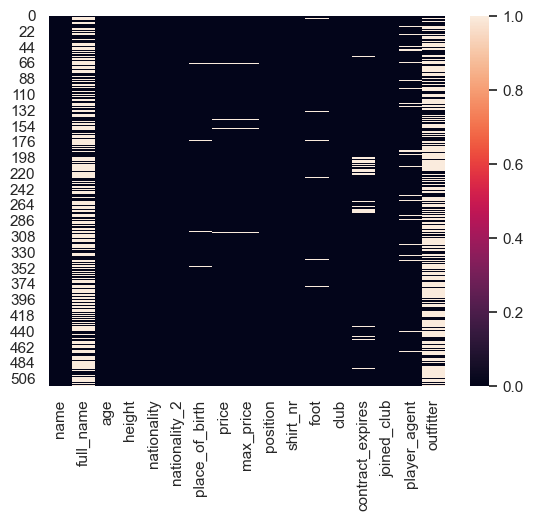

In [814]:
#Use a heatmap to view the number of missing values
sns.heatmap(player_data.isnull())

In [815]:
#Drop fullname column
player_data.drop('full_name', axis = 1, inplace = True)
player_data.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-01-07,PRO Profil GmbH,adidas
1,Yann Sommer,34,1.83,Switzerland,None,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-01-07,BMS Sportconsulting ...,adidas
3,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-01-07,11WINS,NaN
4,Matthijs de Ligt,23,1.89,Netherlands,None,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [816]:
#get the value count of the nationality column
player_data['nationality'].value_counts()

Germany         241
France           37
Austria          21
Netherlands      16
Denmark          16
               ... 
Burkina Faso      1
Canada            1
Ecuador           1
Albania           1
Congo             1
Name: nationality, Length: 64, dtype: int64

In [817]:
#get the value count of the place of birth column
player_data['place_of_birth'].value_counts()

Berlin          20
Stuttgart       13
MÃ¼nchen        12
Hamburg          9
Zagreb           7
                ..
Burghausen       1
Waiblingen       1
Bocholtz         1
Kairo            1
Finsterwalde     1
Name: place_of_birth, Length: 357, dtype: int64

In [818]:

# Create a DataFrame to store the most common city for each country
most_common_cities_df = player_data.groupby('nationality')['place_of_birth'].agg(lambda x: x.mode().iat[0]).reset_index()

# Merge the most_common_cities_df with the original DataFrame
player_data = player_data.merge(most_common_cities_df, on='nationality', suffixes=('', '_most_common'))

# Fill null values in 'city' column with the most common city for each country
player_data['place_of_birth'] = player_data.apply(lambda row: row['place_of_birth_most_common'] if pd.isnull(row['place_of_birth']) else row['place_of_birth'], axis=1)

# Drop the additional column 'city_most_common'
player_data = player_data.drop(columns=['place_of_birth_most_common'])


In [819]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              515 non-null    object        
 1   age               515 non-null    int64         
 2   height            515 non-null    float64       
 3   nationality       515 non-null    object        
 4   nationality_2     515 non-null    object        
 5   place_of_birth    515 non-null    object        
 6   price             510 non-null    float64       
 7   max_price         510 non-null    float64       
 8   position          515 non-null    object        
 9   shirt_nr          515 non-null    int64         
 10  foot              506 non-null    object        
 11  club              515 non-null    object        
 12  contract_expires  481 non-null    datetime64[ns]
 13  joined_club       515 non-null    datetime64[ns]
 14  player_agent      488 non-

In [820]:
#Check the players that have missing price values
player_data[player_data['price'].isnull()]

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
31,Oskar Preil,19,1.87,Germany,None,Berlin,NaN,NaN,Goalkeeper,29,right,RB Leipzig,2023-06-30,2022-01-07,SOCCERNATION GROUP,NaN
63,Simon Walde,18,1.85,Germany,None,DÃ¼sseldorf,NaN,NaN,Defender - Right-Back,45,right,Bor. M'gladbach,2026-06-30,2023-04-01,Wasserman,adidas
133,Mert KÃ¶mÃ¼r,17,1.83,Germany,Turkey,Dachau,NaN,NaN,midfield - Attacking Midfield,20,both,FC Augsburg U19,2027-06-30,2022-01-07,Agent is known - Player under 18,adidas
171,Elias Bakatukanda,19,1.93,Germany,DR Congo,KÃ¶ln,NaN,NaN,Defender - Centre-Back,5,both,1.FC KÃ¶ln U19,2026-06-30,2021-01-07,FM Worldsport,NaN
349,Nacho Ferri,18,1.92,Spain,None,Montaverner,NaN,NaN,Attack - Centre-Forward,48,right,E. Frankfurt,2025-06-30,2022-05-10,INVSPORT (Sergio ...,NaN


In [821]:
#Create a new column that groups the age column
def age_group(x):
    if x < 20:
        return 'Prospect'
    elif x < 25:
        return 'First team'
    elif x<=35:
        return 'Peak player'
    else:
        return 'Veteran'


In [822]:
#Apply the Age group function to our dataset
player_data['age_group'] = player_data['age'].apply(age_group)

In [823]:
player_data.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,age_group
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-01-07,PRO Profil GmbH,adidas,Veteran
1,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-01-07,BMS Sportconsulting ...,adidas,Peak player
2,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-01-07,11WINS,NaN,First team
3,Joshua Kimmich,28,1.77,Germany,None,Rottweil,80.0,90.0,midfield - Defensive Midfield,6,right,Bayern Munich,2025-06-30,2015-02-07,NaN,NaN,Peak player
4,Leon Goretzka,28,1.89,Germany,None,Bochum,65.0,70.0,midfield - Central Midfield,8,right,Bayern Munich,2026-06-30,2018-01-07,Neubauer 13 GmbH,NaN,Peak player


In [824]:
#Group the Age group and their average price 
player_data.groupby('age_group')['price'].mean()

age_group
First team     9.885965
Peak player    8.385475
Prospect       5.289130
Veteran        1.216667
Name: price, dtype: float64

In [825]:
#Group the Age group and their average max_price
player_data.groupby('age_group')['max_price'].mean()

age_group
First team     11.746199
Peak player    16.034331
Prospect        5.377174
Veteran         9.138889
Name: max_price, dtype: float64

In [826]:
#A function that that updates the null values in the price column with the average price of each age group
def fill_price(x):
    age_group = x[0]
    price = x[1]
    if pd.isnull(price):
        if age_group == 'First team':
            return 9.9
        elif age_group == 'Peak player':
            return 8.4
        elif age_group == 'Prospect':
            return 5.3
        else:
            return 1.2
    else:
        return price

In [827]:
#A function that that updates the null values in the max price column with the average price of each age group
def fill_mprice(x):
    age_group = x[0]
    max_price =x[1]
    if pd.isnull(max_price):
        if age_group == 'First team':
            return 11.7
        elif age_group == 'Peak player':
            return 16.03
        elif age_group == 'Prospect':
            return 5.4
        else:
            return 9.1
    else:
        return max_price

In [828]:
player_data['price'] = player_data[['age_group', 'price']].apply(fill_price, axis =1)

In [829]:
player_data['max_price'] = player_data[['age_group', 'max_price']].apply(fill_mprice, axis =1)

In [830]:
player_data['age_group'].value_counts()

Peak player    284
First team     171
Prospect        51
Veteran          9
Name: age_group, dtype: int64

In [831]:
#Group the position and the value count of players foot
player_data.groupby('position')['foot'].value_counts()

position                       foot 
Attack - Centre-Forward        right    58
                               left     11
                               both      3
Attack - Left Winger           right    16
                               left      5
                               both      1
Attack - Right Winger          right    21
                               left      7
                               both      1
Attack - Second Striker        right     5
                               both      1
                               left      1
Defender - Centre-Back         right    57
                               left     28
                               both      2
Defender - Left-Back           left     38
                               both      1
                               right     1
Defender - Right-Back          right    42
                               both      2
Goalkeeper                     right    50
                               both     11
                 

In [832]:
def fill_missing_foot_by_position(df):
    # Calculate the most common foot for each player position
    most_common_foot_by_position = df.groupby('position')['foot'].transform(lambda x: x.mode().iat[0])
    
    # Fill missing values in the 'foot' column with the most common foot for each position
    df['foot'].fillna(most_common_foot_by_position, inplace=True)
    
    return df


# Call the function to fill missing 'foot' values by position
player_data = fill_missing_foot_by_position(player_data)



In [833]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              515 non-null    object        
 1   age               515 non-null    int64         
 2   height            515 non-null    float64       
 3   nationality       515 non-null    object        
 4   nationality_2     515 non-null    object        
 5   place_of_birth    515 non-null    object        
 6   price             515 non-null    float64       
 7   max_price         515 non-null    float64       
 8   position          515 non-null    object        
 9   shirt_nr          515 non-null    int64         
 10  foot              515 non-null    object        
 11  club              515 non-null    object        
 12  contract_expires  481 non-null    datetime64[ns]
 13  joined_club       515 non-null    datetime64[ns]
 14  player_agent      488 non-

In [834]:
#Fill in missing values in outffitter column with arbituary data "not available"
player_data['outfitter'] = player_data['outfitter'].fillna('Not available')

In [835]:
#Fill in missing values in player agent column with arbituary data "Unknown"
player_data['player_agent'] = player_data['player_agent'].fillna('Himself')

In [836]:
# extract the day, month, and year components of the joined_club column
player_data['day_joined'] = player_data['joined_club'].dt.day
player_data['month_joined'] = player_data['joined_club'].dt.month
player_data['year_joined'] = player_data['joined_club'].dt.year

In [837]:
player_data.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,age_group,day_joined,month_joined,year_joined
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-01-07,PRO Profil GmbH,adidas,Veteran,7,1,2011
1,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-01-07,BMS Sportconsulting ...,adidas,Peak player,7,1,2021
2,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,right,Bayern Munich,2024-06-30,2022-01-07,11WINS,Not available,First team,7,1,2022
3,Joshua Kimmich,28,1.77,Germany,None,Rottweil,80.0,90.0,midfield - Defensive Midfield,6,right,Bayern Munich,2025-06-30,2015-02-07,Himself,Not available,Peak player,7,2,2015
4,Leon Goretzka,28,1.89,Germany,None,Bochum,65.0,70.0,midfield - Central Midfield,8,right,Bayern Munich,2026-06-30,2018-01-07,Neubauer 13 GmbH,Not available,Peak player,7,1,2018


In [838]:
player_data['year_exp'] = player_data['contract_expires'].dt.year

In [839]:
player_data.groupby('year_exp')['age_group'].value_counts()

year_exp  age_group  
2023.0    Peak player    66
          First team     24
          Prospect        5
          Veteran         5
2024.0    Peak player    84
          First team     26
          Prospect        5
          Veteran         4
2025.0    Peak player    59
          First team     48
          Prospect       18
2026.0    Peak player    46
          First team     35
          Prospect       12
2027.0    First team     28
          Peak player     9
          Prospect        6
2028.0    Prospect        1
Name: age_group, dtype: int64

In [840]:
#Create a column that shows the years left from a player's contract
player_data['remaining_contract'] = player_data['year_exp'] - 2023

In [841]:
#Create a column that shows the years a player as played for a particular club
player_data['total_years_in_bundesliga'] = 2023 - player_data['year_joined']

In [842]:
player_data.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,...,joined_club,player_agent,outfitter,age_group,day_joined,month_joined,year_joined,year_exp,remaining_contract,total_years_in_bundesliga
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,...,2011-01-07,PRO Profil GmbH,adidas,Veteran,7,1,2011,2024.0,1.0,12
1,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,...,2021-01-07,BMS Sportconsulting ...,adidas,Peak player,7,1,2021,2024.0,1.0,2
2,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,...,2022-01-07,11WINS,Not available,First team,7,1,2022,2024.0,1.0,1
3,Joshua Kimmich,28,1.77,Germany,None,Rottweil,80.0,90.0,midfield - Defensive Midfield,6,...,2015-02-07,Himself,Not available,Peak player,7,2,2015,2025.0,2.0,8
4,Leon Goretzka,28,1.89,Germany,None,Bochum,65.0,70.0,midfield - Central Midfield,8,...,2018-01-07,Neubauer 13 GmbH,Not available,Peak player,7,1,2018,2026.0,3.0,5


In [843]:
#To fill in the missing data for our player's contract expiry year
player_data.groupby('age_group')['remaining_contract'].mean()

age_group
First team     2.105590
Peak player    1.424242
Prospect       2.255319
Veteran        0.444444
Name: remaining_contract, dtype: float64

In [844]:
#A function that that updates the null values in the price column with the average price of each age group
def fill_contract(x):
    age_group = x[0]
    exp_year = x[1]
    if pd.isnull(exp_year):
        if age_group == 'First team':
            return 2025
        elif age_group == 'Peak player':
            return 2024
        elif age_group == 'Prospect':
            return 2025
        else:
            return 
    else:
        return exp_year

In [845]:
#Fill the missing values in the the exp_year column with the fill_contract function
player_data['year_exp'] = player_data[['age_group', 'year_exp']].apply(fill_contract, axis =1)

In [846]:
#Rename the day month and year column so we can be able to use to_datetime to merge together
player_data.rename(columns = {'year_exp':'year','month_joined':'month','day_joined':'day'}, inplace=True)


In [847]:
def combine_and_fill_contract_date(df, year_col, month_col, day_col, contract_col):
    # Combine year, month, and day columns into a new 'contract_date' column
    df['contract_date'] = pd.to_datetime(df[[year_col, month_col, day_col]], errors='coerce')
    
    # Fill null values in the 'contract' column with the new 'contract_date' column
    df['contract_expires'].fillna(df['contract_date'], inplace=True)
    
    # Drop the intermediate 'contract_date' column if needed
    df.drop(columns=['contract_date'], inplace=True)
    
    return df



In [848]:
# Specify column names for year, month, day, and contract
year_column = 'year'
month_column ='month'
day_column = 'day'
contract_column ='contract_expires'

# Call the function to combine and fill the 'contract' column
player_data = combine_and_fill_contract_date(player_data, year_column, month_column, day_column, contract_column)



In [849]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       515 non-null    object        
 1   age                        515 non-null    int64         
 2   height                     515 non-null    float64       
 3   nationality                515 non-null    object        
 4   nationality_2              515 non-null    object        
 5   place_of_birth             515 non-null    object        
 6   price                      515 non-null    float64       
 7   max_price                  515 non-null    float64       
 8   position                   515 non-null    object        
 9   shirt_nr                   515 non-null    int64         
 10  foot                       515 non-null    object        
 11  club                       515 non-null    object        
 12  contract

In [850]:
#Rename day month and year columns to initial names
player_data.rename(columns = {'year':'year_exp','month':'month_joined','day':'day_joined'}, inplace=True)

In [851]:
player_data['year_exp'] = player_data['year_exp'].astype(int)

In [852]:
#Create a column that shows the years left from a player's contract
player_data['remaining_contract'] = player_data['year_exp'] - 2023

In [853]:
#Create a column that shows the years a player as played for a particular club
player_data['total_years_in_club'] = player_data['year_exp'] - player_data['year_joined']

ANALYSIS

In [854]:
#Number of unique clubs in the Bundesliga
player_data['club'].nunique()


28

In [855]:

#list of unique clubs in the Bundesliga
player_data['club'].unique()

array(['Bayern Munich', 'Bor. Dortmund', 'B. Dortmund II', 'RB Leipzig',
       'RB Leipzig U19', 'RB Leipzig U17', 'B. Leverkusen',
       'E. Frankfurt', "Bor. M'gladbach", 'VfL Wolfsburg', 'SC Freiburg',
       'TSG Hoffenheim', 'Union Berlin', 'FC Augsburg', 'FC Augsburg U19',
       'VfB Stuttgart', '1.FSV Mainz 05', '1.FC KÃ¶ln', '1.FC KÃ¶ln II',
       '1.FC KÃ¶ln U19', 'Hertha BSC', 'Hertha BSC II', 'Hertha BSC U19',
       'Werder Bremen', 'W. Bremen U19', 'W. Bremen II', 'FC Schalke 04',
       'VfL Bochum'], dtype=object)

In [856]:
#A function to seperate clubs in the first division from others
def division(df):
    #variable holdig the list of clubs in the first division
    first_division = ['Bayern Munich', 'Bor. Dortmund', 'RB Leipzig', 'B. Leverkusen',
       'E. Frankfurt', "Bor. M'gladbach", 'VfL Wolfsburg', 'SC Freiburg','TSG Hoffenheim',
        'Union Berlin', 'FC Augsburg','VfB Stuttgart', '1.FSV Mainz 05', '1.FC KÃ¶ln',
        'Hertha BSC','Werder Bremen', 'FC Schalke 04','VfL Bochum']
    #if a club is in the list, return first division, esle other division
    if df['club'] in first_division:
        return 'first division'
    else:
        return 'other divisions'

In [857]:
#Create a new column called league_division and apply the divsion function t this column
player_data['league_division'] = player_data.apply(division, axis =1)

In [858]:
#Number of uniques club in the first and other divisions
clubs_division = player_data.groupby('league_division')['club'].nunique().reset_index()
clubs_division

,league_division,club
0,first division,18
1,other divisions,10


(array([0, 1]), [Text(0, 0, 'first division'), Text(1, 0, 'other divisions')])

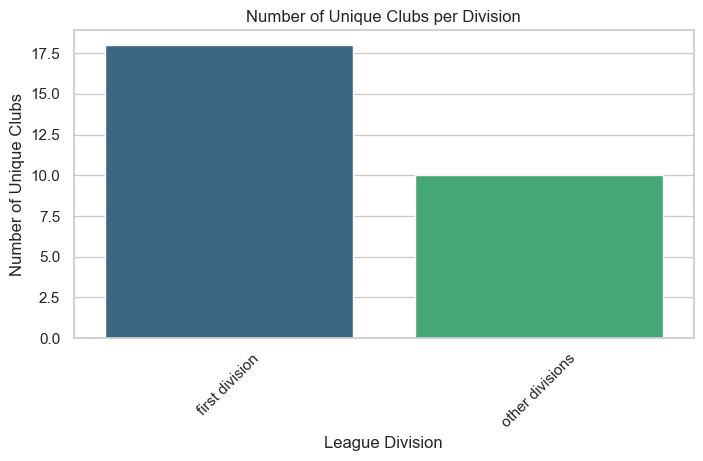

In [859]:
# Create a Seaborn bar plot of clubs per division
plt.figure(figsize=(8, 4))
sns.barplot(data=clubs_division, x='league_division', y='club', palette='viridis')
plt.xlabel('League Division')
plt.ylabel('Number of Unique Clubs')
plt.title('Number of Unique Clubs per Division')
plt.xticks(rotation=45)

In [860]:
#number of players in each club
player_data['club'].value_counts()

TSG Hoffenheim     31
FC Schalke 04      31
FC Augsburg        31
E. Frankfurt       30
Bor. Dortmund      30
VfB Stuttgart      29
VfL Bochum         28
Hertha BSC         27
1.FC KÃ¶ln         27
1.FSV Mainz 05     27
Union Berlin       27
Bayern Munich      27
Bor. M'gladbach    27
B. Leverkusen      27
SC Freiburg        26
VfL Wolfsburg      25
RB Leipzig         25
Werder Bremen      24
1.FC KÃ¶ln II       5
B. Dortmund II      3
RB Leipzig U17      1
RB Leipzig U19      1
1.FC KÃ¶ln U19      1
Hertha BSC II       1
Hertha BSC U19      1
W. Bremen U19       1
W. Bremen II        1
FC Augsburg U19     1
Name: club, dtype: int64

Results
1. The dataset represents players from 28 unique teams in the Germany(first division and other division)
2. We have 18 teams from the first division and 10 teams from other division

For this analysis, we will be focused on teams in the First Division

In [861]:
#Create a new dataframe for First division players
player_data_first_division = player_data[(player_data['league_division'] == 'first division')]


In [862]:
#number of players in each club
Number_players_club = player_data_first_division['club'].value_counts()
Number_players_club

FC Augsburg        31
FC Schalke 04      31
TSG Hoffenheim     31
E. Frankfurt       30
Bor. Dortmund      30
VfB Stuttgart      29
VfL Bochum         28
Hertha BSC         27
1.FC KÃ¶ln         27
1.FSV Mainz 05     27
Bayern Munich      27
Bor. M'gladbach    27
B. Leverkusen      27
Union Berlin       27
SC Freiburg        26
VfL Wolfsburg      25
RB Leipzig         25
Werder Bremen      24
Name: club, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Bayern Munich'),
  Text(1, 0, 'Bor. Dortmund'),
  Text(2, 0, 'RB Leipzig'),
  Text(3, 0, 'B. Leverkusen'),
  Text(4, 0, 'E. Frankfurt'),
  Text(5, 0, "Bor. M'gladbach"),
  Text(6, 0, 'VfL Wolfsburg'),
  Text(7, 0, 'SC Freiburg'),
  Text(8, 0, 'TSG Hoffenheim'),
  Text(9, 0, 'Union Berlin'),
  Text(10, 0, 'FC Augsburg'),
  Text(11, 0, 'VfB Stuttgart'),
  Text(12, 0, '1.FSV Mainz 05'),
  Text(13, 0, '1.FC KÃ¶ln'),
  Text(14, 0, 'Hertha BSC'),
  Text(15, 0, 'Werder Bremen'),
  Text(16, 0, 'FC Schalke 04'),
  Text(17, 0, 'VfL Bochum')])

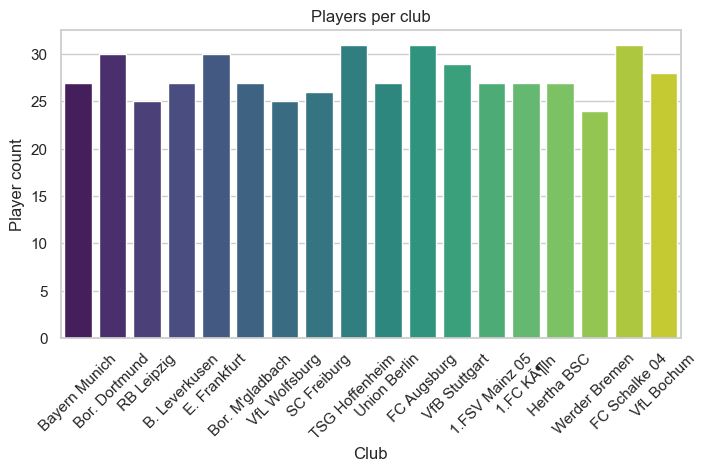

In [863]:
# Create a Seaborn count plot of players per club
plt.figure(figsize=(8, 4))
sns.countplot(data=player_data_first_division, x='club', palette='viridis')
plt.xlabel('Club')
plt.ylabel('Player count')
plt.title('Players per club')
plt.xticks(rotation=45)

In [864]:
#Average number of players in each club
Av_players_club = Number_players_club.mean()
Av_players_club

27.72222222222222

In [865]:
player_data_first_division.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,...,outfitter,age_group,day_joined,month_joined,year_joined,year_exp,remaining_contract,total_years_in_bundesliga,total_years_in_club,league_division
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,...,adidas,Veteran,7,1,2011,2024,1,12,13,first division
1,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,...,adidas,Peak player,7,1,2021,2024,1,2,3,first division
2,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,...,Not available,First team,7,1,2022,2024,1,1,2,first division
3,Joshua Kimmich,28,1.77,Germany,None,Rottweil,80.0,90.0,midfield - Defensive Midfield,6,...,Not available,Peak player,7,2,2015,2025,2,8,10,first division
4,Leon Goretzka,28,1.89,Germany,None,Bochum,65.0,70.0,midfield - Central Midfield,8,...,Not available,Peak player,7,1,2018,2026,3,5,8,first division


AGE ANALYSIS

C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\2190572979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(player_data_first_division['age'])


<Axes: xlabel='age', ylabel='Density'>

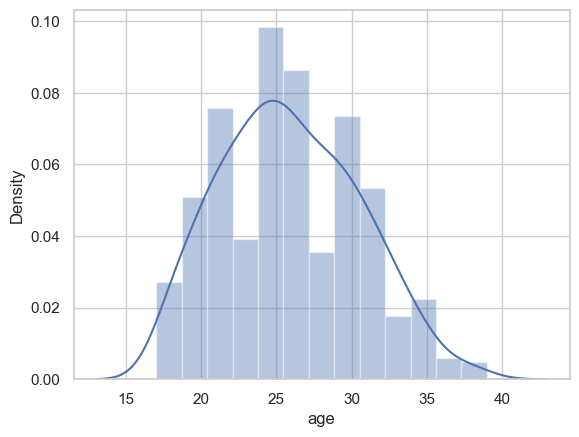

In [866]:
#Age distribution of players in the bundesliga
sns.distplot(player_data_first_division['age'])

C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\1656994321.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(player_data_first_division['age'], hist=True, kde=True, rug=False)


((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

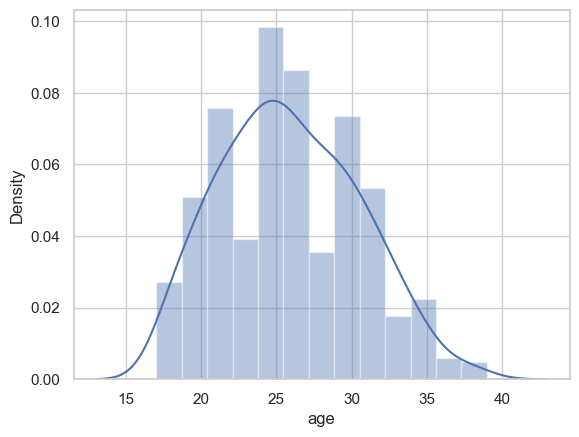

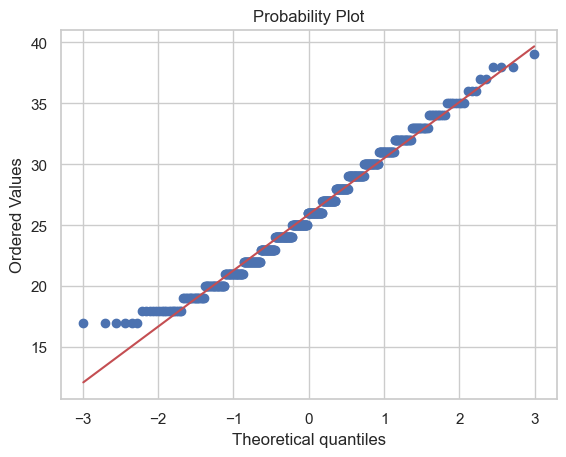

In [867]:
import scipy.stats as stats

# Create a distplot
sns.set(style="whitegrid")
sns.distplot(player_data_first_division['age'], hist=True, kde=True, rug=False)

# Create a Q-Q plot
plt.figure()
stats.probplot(player_data_first_division['age'], dist="norm", plot=plt)

In [868]:
#Oldest player in the division
oldest_player = player_data_first_division[(player_data_first_division['age'] == player_data_first_division['age'].max())][['name', 'age', 'club','position', 'nationality','price']]

#Youngest player in the division
youngest_player = player_data_first_division[(player_data_first_division['age'] == player_data_first_division['age'].min())][['name', 'age', 'club','position', 'nationality', 'price']]

oldest_player

,name,age,club,position,nationality,price
448,Makoto Hasebe,39,E. Frankfurt,Defender - Centre-Back,Japan,0.8


In [869]:
youngest_player

,name,age,club,position,nationality,price
6,Paul Wanner,17,Bayern Munich,midfield - Attacking Midfield,Germany,3.0
7,Arijon Ibrahimovic,17,Bayern Munich,midfield - Attacking Midfield,Germany,1.0
107,Tom Bischof,17,TSG Hoffenheim,midfield - Attacking Midfield,Germany,3.5
156,Philipp Schulz,17,1.FSV Mainz 05,Defender - Centre-Back,Germany,0.3
341,Julien Duranville,17,Bor. Dortmund,Attack - Right Winger,Belgium,5.0
479,Fabio Chiarodia,17,Werder Bremen,Defender - Centre-Back,Italy,1.0


In [870]:
#oldest player by club
idx_old = player_data_first_division.groupby('club')['age'].idxmax()

oldest_club = player_data_first_division.loc[idx_old, ['name', 'age', 'position', 'club', 'nationality', 'price']]

oldest_club.sort_values('age', ascending = False)

,name,age,position,club,nationality,price
448,Makoto Hasebe,39,Defender - Centre-Back,E. Frankfurt,Japan,0.80
339,Rune Jarstein,38,Goalkeeper,Hertha BSC,Norway,0.30
97,Philipp Pentke,38,Goalkeeper,TSG Hoffenheim,Germany,0.30
401,Michael Langer,38,Goalkeeper,FC Schalke 04,Austria,0.05
0,Manuel Neuer,37,Goalkeeper,Bayern Munich,Germany,7.00
303,Anthony Losilla,37,midfield - Defensive Midfield,VfL Bochum,France,0.50
393,Christopher Trimmel,36,Defender - Right-Back,Union Berlin,Austria,0.80
388,Pavao Pervan,35,Goalkeeper,VfL Wolfsburg,Austria,0.40
274,Anthony Modeste,35,Attack - Centre-Forward,Bor. Dortmund,France,1.00
59,Tobias Sippel,35,Goalkeeper,Bor. M'gladbach,Germany,0.40


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Jonas Hector'),
  Text(1, 0, 'Stefan Bell'),
  Text(2, 0, 'Karim Bellarabi'),
  Text(3, 0, 'Manuel Neuer'),
  Text(4, 0, 'Anthony Modeste'),
  Text(5, 0, 'Tobias Sippel'),
  Text(6, 0, 'Makoto Hasebe'),
  Text(7, 0, 'Julian Baumgartlinger'),
  Text(8, 0, 'Michael Langer'),
  Text(9, 0, 'Rune Jarstein'),
  Text(10, 0, 'PÃ©ter GulÃ¡csi'),
  Text(11, 0, 'Nils Petersen'),
  Text(12, 0, 'Philipp Pentke'),
  Text(13, 0, 'Christopher Trimmel'),
  Text(14, 0, 'Genki Haraguchi'),
  Text(15, 0, 'Anthony Losilla'),
  Text(16, 0, 'Pavao Pervan'),
  Text(17, 0, 'Christian GroÃ\x9f')])

C:\Users\Kayode\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 159 (\x9f) missing from current font.
  func(*args, **kwargs)
C:\Users\Kayode\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


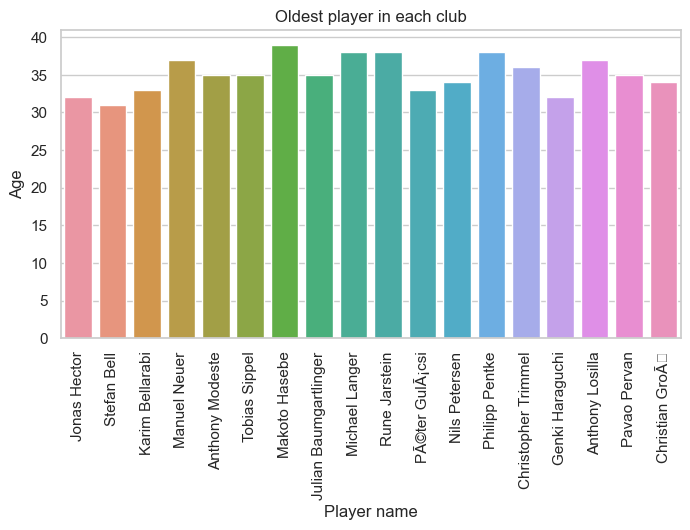

In [871]:
# Create a Seaborn bar plot of the oldest player in s=each club
plt.figure(figsize=(8, 4))
sns.barplot(data=oldest_club, x='name', y='age')
plt.xlabel('Player name')
plt.ylabel('Age')
plt.title('Oldest player in each club')
plt.xticks(rotation=90)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='club')

In [872]:
#oldest player by position
idx_oldp = player_data_first_division.groupby('position')['age'].idxmax()

oldest_position = player_data_first_division.loc[idx_oldp, ['name', 'age', 'position', 'club', 'nationality', 'price']]

oldest_position.sort_values('age', ascending = False)

,name,age,position,club,nationality,price
448,Makoto Hasebe,39,Defender - Centre-Back,E. Frankfurt,Japan,0.8
97,Philipp Pentke,38,Goalkeeper,TSG Hoffenheim,Germany,0.3
303,Anthony Losilla,37,midfield - Defensive Midfield,VfL Bochum,France,0.5
393,Christopher Trimmel,36,Defender - Right-Back,Union Berlin,Austria,0.8
474,Kevin-Prince Boateng,36,midfield - Attacking Midfield,Hertha BSC,Ghana,0.7
229,Simon Terodde,35,Attack - Centre-Forward,FC Schalke 04,Germany,1.0
477,Daniel Caligiuri,35,Attack - Right Winger,FC Augsburg,Italy,0.6
10,Thomas MÃ¼ller,33,Attack - Second Striker,Bayern Munich,Germany,18.0
252,Daley Blind,33,Defender - Left-Back,Bayern Munich,Netherlands,6.0
223,Danny Latza,33,midfield - Central Midfield,FC Schalke 04,Germany,0.6


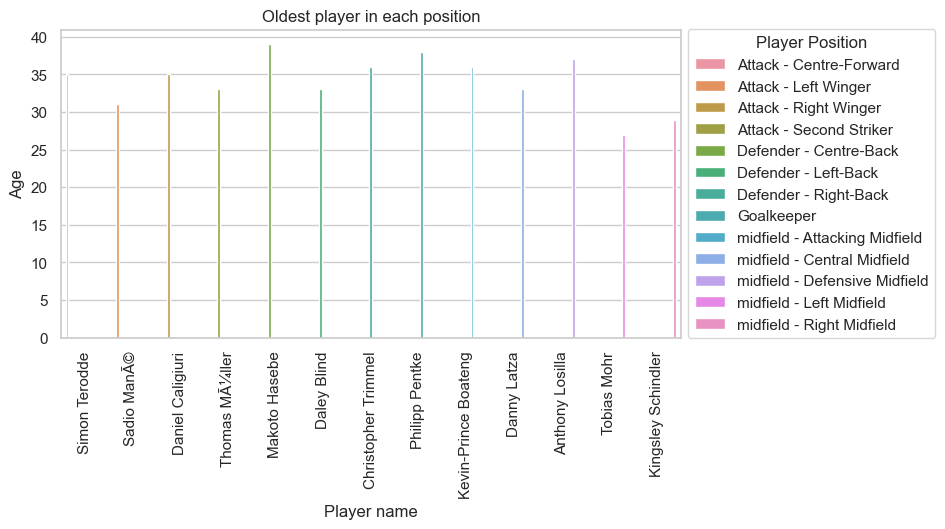

In [873]:
# Create a Seaborn bar plot of the oldest player in s=each club
plt.figure(figsize=(8, 4))
sns.barplot(data=oldest_position, x='name', y='age', hue='position')
plt.xlabel('Player name')
plt.ylabel('Age')
plt.title('Oldest player in each position')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Player Position')

The age distribution of players in the first division peaked between the ages of 23 to 25 years.
The age of players is approximately normally distributed. From the Dist plot, we can see a specific shape called a 'bell curve.' 
This curve means that most people have ages close to the average, and as we move away from the average in either direction, the number of people with those ages decreases.
In the first division, as expected, majority of players below 20 are prospect and are still being groomed to play in the first division. 
Also, as players grow older, nature takes its turn on the and they can't compete at the top level week in week out. So as they age, they retire from the game.

Frankfurts, Makoto Hasabe is the oldest player in the first division at age 39 while 6 players occupy the yougest players spot at age 17 each.

Goalkeepers occupy 38% of the oldest players in each club, which signifies that they have high longetivity that other positions of the field

<Axes: xlabel='age_group', ylabel='count'>

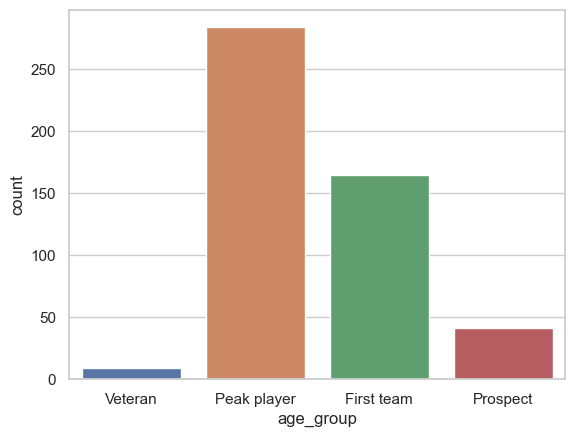

In [874]:
#Count of players by age group
sns.countplot(player_data_first_division, x='age_group')

In [875]:
#Average age of each player position
age_position = player_data_first_division.groupby('position')['age'].mean().reset_index()
age_position

,position,age
0,Attack - Centre-Forward,26.169014
1,Attack - Left Winger,24.545455
2,Attack - Right Winger,24.966667
3,Attack - Second Striker,26.571429
4,Defender - Centre-Back,25.529412
5,Defender - Left-Back,26.205128
6,Defender - Right-Back,26.340909
7,Goalkeeper,27.796875
8,midfield - Attacking Midfield,24.657895
9,midfield - Central Midfield,24.636364


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Attack - Centre-Forward'),
  Text(1, 0, 'Attack - Left Winger'),
  Text(2, 0, 'Attack - Right Winger'),
  Text(3, 0, 'Attack - Second Striker'),
  Text(4, 0, 'Defender - Centre-Back'),
  Text(5, 0, 'Defender - Left-Back'),
  Text(6, 0, 'Defender - Right-Back'),
  Text(7, 0, 'Goalkeeper'),
  Text(8, 0, 'midfield - Attacking Midfield'),
  Text(9, 0, 'midfield - Central Midfield'),
  Text(10, 0, 'midfield - Defensive Midfield'),
  Text(11, 0, 'midfield - Left Midfield'),
  Text(12, 0, 'midfield - Right Midfield')])

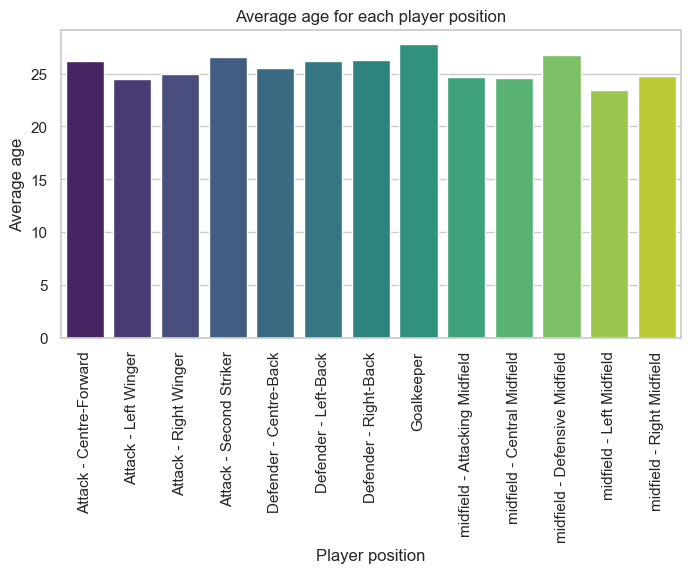

In [876]:
# Create a Seaborn bar plot of clubs per division
plt.figure(figsize=(8, 4))
sns.barplot(data=age_position, x='position', y='age', palette='viridis')
plt.xlabel('Player position')
plt.ylabel('Average age')
plt.title('Average age for each player position')
plt.xticks(rotation=90)

The average age of player by their position in the first division is still below 30 which is impressive. This shows the league has low rate of retirement due to age in the future.
The goalkeeping department has the highest average age of players at 27 years while the left midfield position has the lowest average age at 23

In [877]:
#Average age of each player club
age_club = player_data_first_division.groupby('club')['age'].mean().reset_index()
age_club = age_club.sort_values('age')
age_club

,club,age
14,VfB Stuttgart,23.724138
16,VfL Wolfsburg,24.600000
2,B. Leverkusen,24.888889
4,Bor. Dortmund,25.033333
1,1.FSV Mainz 05,25.074074
6,E. Frankfurt,25.200000
7,FC Augsburg,25.516129
12,TSG Hoffenheim,25.806452
0,1.FC KÃ¶ln,25.814815
17,Werder Bremen,25.833333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'VfB Stuttgart'),
  Text(1, 0, 'VfL Wolfsburg'),
  Text(2, 0, 'B. Leverkusen'),
  Text(3, 0, 'Bor. Dortmund'),
  Text(4, 0, '1.FSV Mainz 05'),
  Text(5, 0, 'E. Frankfurt'),
  Text(6, 0, 'FC Augsburg'),
  Text(7, 0, 'TSG Hoffenheim'),
  Text(8, 0, '1.FC KÃ¶ln'),
  Text(9, 0, 'Werder Bremen'),
  Text(10, 0, "Bor. M'gladbach"),
  Text(11, 0, 'SC Freiburg'),
  Text(12, 0, 'RB Leipzig'),
  Text(13, 0, 'Bayern Munich'),
  Text(14, 0, 'Hertha BSC'),
  Text(15, 0, 'FC Schalke 04'),
  Text(16, 0, 'Union Berlin'),
  Text(17, 0, 'VfL Bochum')])

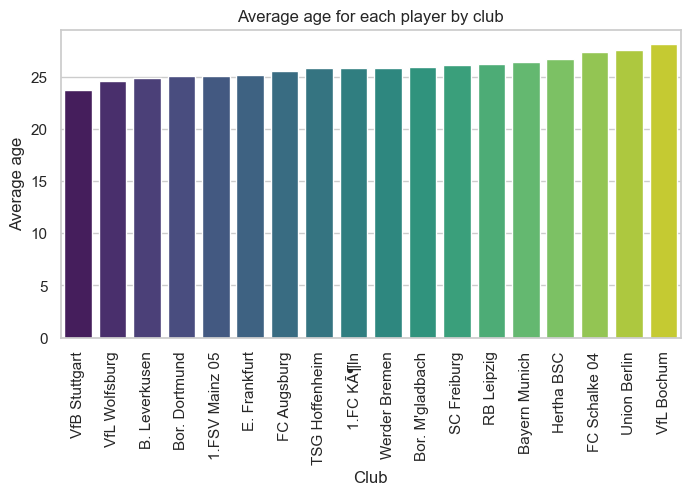

In [878]:
# Create a Seaborn bar plot of average age of players by club
plt.figure(figsize=(8, 4))
sns.barplot(data=age_club, x='club', y='age', palette='viridis')
plt.xlabel('Club')
plt.ylabel('Average age')
plt.title('Average age for each player by club')
plt.xticks(rotation=90)

In [879]:
#Get the top nations by number of players
top_10_nations = player_data_first_division['nationality'].value_counts().head(10)

#Get the top nations by number of players
top_10_nations_i = player_data_first_division['nationality'].value_counts().head(10).index

# Filter the DataFrame for players from the top 10 nations
filtered_data = player_data_first_division[player_data_first_division['nationality'].isin(top_10_nations_i)]

# Calculate the mean age of players from the top 10 nations
mean_age_by_nation = filtered_data.groupby('nationality')['age'].mean().reset_index()
mean_age_by_nation = mean_age_by_nation.sort_values('age')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Croatia'),
  Text(2, 0, 'Portugal'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Denmark'),
  Text(7, 0, 'Austria'),
  Text(8, 0, 'Switzerland'),
  Text(9, 0, 'Japan')])

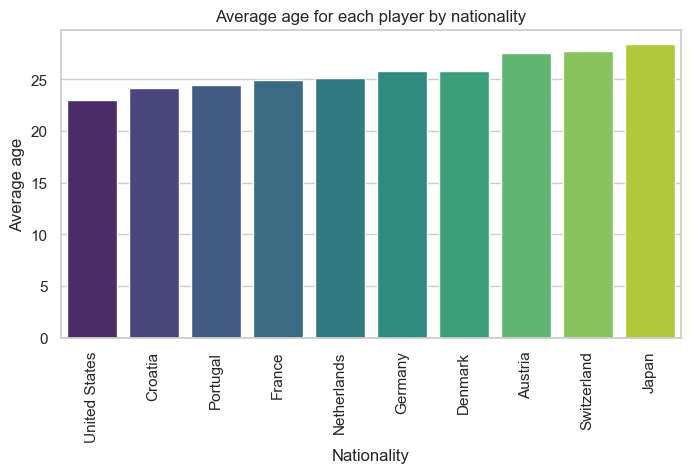

In [880]:
# Create a Seaborn bar plot of average age of players by top 10 nations
plt.figure(figsize=(8, 4))
sns.barplot(data=mean_age_by_nation, x='nationality', y='age', palette='viridis')
plt.xlabel('Nationality')
plt.ylabel('Average age')
plt.title('Average age for each player by nationality')
plt.xticks(rotation=90)

HIEGHT - AVERAGE OF PLAYERS HIEGHT BY POSITION

In [881]:
#Get the mean hieght of players by thier position and assign the value to a variable
height_position = player_data_first_division.groupby('position')['height'].mean().reset_index()
height_position = height_position.sort_values('height')
height_position

,position,height
11,midfield - Left Midfield,1.765000
1,Attack - Left Winger,1.791364
2,Attack - Right Winger,1.802000
8,midfield - Attacking Midfield,1.803684
5,Defender - Left-Back,1.807436
6,Defender - Right-Back,1.812045
3,Attack - Second Striker,1.814286
9,midfield - Central Midfield,1.823273
12,midfield - Right Midfield,1.830000
10,midfield - Defensive Midfield,1.845526


In [882]:

# Find the index of the player with the highest height for each position
idx = player_data_first_division.groupby('position')['height'].idxmax()

# Get the corresponding names of players
players_with_highest_height = player_data_first_division.loc[idx, ['position', 'name', 'height', 'club']]

# Display the result
players_with_highest_height.sort_values(by='height', ascending=False, inplace = True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Florian Schock'),
  Text(1, 0, 'Luca Pfeiffer'),
  Text(2, 0, 'Dan-Axel Zagadou'),
  Text(3, 0, 'Anton Stach'),
  Text(4, 0, 'Tom Rothe'),
  Text(5, 0, 'Merlin RÃ¶hl'),
  Text(6, 0, 'Thomas Meunier'),
  Text(7, 0, 'Felix Nmecha'),
  Text(8, 0, 'Kelian Nsona'),
  Text(9, 0, 'Marius BÃ¼lter'),
  Text(10, 0, 'Thomas MÃ¼ller'),
  Text(11, 0, 'Robert Skov'),
  Text(12, 0, 'Tobias Mohr')])

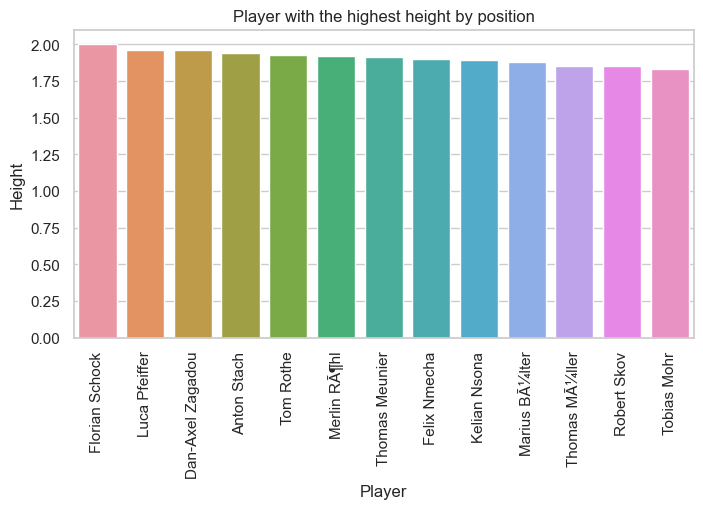

In [883]:
# Create a Seaborn bar plot of the player with the highest height by position
plt.figure(figsize=(8, 4))
sns.barplot(data=players_with_highest_height, x='name', y='height')
plt.xlabel('Player')
plt.ylabel('Height')
plt.title('Player with the highest height by position')
plt.xticks(rotation=90)

In [884]:
players_with_highest_height

,position,name,height,club
139,Goalkeeper,Florian Schock,2.00,VfB Stuttgart
148,Attack - Centre-Forward,Luca Pfeiffer,1.96,VfB Stuttgart
295,Defender - Centre-Back,Dan-Axel Zagadou,1.96,VfB Stuttgart
158,midfield - Defensive Midfield,Anton Stach,1.94,1.FSV Mainz 05
18,Defender - Left-Back,Tom Rothe,1.93,Bor. Dortmund
91,midfield - Central Midfield,Merlin RÃ¶hl,1.92,SC Freiburg
340,Defender - Right-Back,Thomas Meunier,1.91,Bor. Dortmund
76,midfield - Attacking Midfield,Felix Nmecha,1.90,VfL Wolfsburg
301,Attack - Right Winger,Kelian Nsona,1.89,Hertha BSC
226,Attack - Left Winger,Marius BÃ¼lter,1.88,FC Schalke 04


The tallest player in the bundesliga is Florian Schock, a goalkeeper who plays for VfB Stuttgart. Interstingly, VfB Stuttgart have the tallest goalkeeper, centre defender and center forward in the Bundesliga

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'midfield - Left Midfield'),
  Text(1, 0, 'Attack - Left Winger'),
  Text(2, 0, 'Attack - Right Winger'),
  Text(3, 0, 'midfield - Attacking Midfield'),
  Text(4, 0, 'Defender - Left-Back'),
  Text(5, 0, 'Defender - Right-Back'),
  Text(6, 0, 'Attack - Second Striker'),
  Text(7, 0, 'midfield - Central Midfield'),
  Text(8, 0, 'midfield - Right Midfield'),
  Text(9, 0, 'midfield - Defensive Midfield'),
  Text(10, 0, 'Attack - Centre-Forward'),
  Text(11, 0, 'Defender - Centre-Back'),
  Text(12, 0, 'Goalkeeper')])

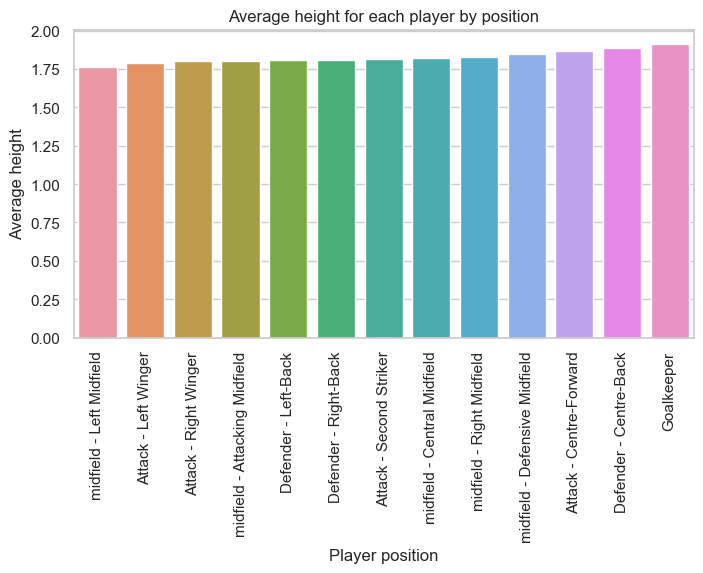

In [885]:
# Create a Seaborn bar plot of average height of players by position
plt.figure(figsize=(8, 4))
sns.barplot(data=height_position, x='position', y='height')
plt.xlabel('Player position')
plt.ylabel('Average height')
plt.title('Average height for each player by position')
plt.xticks(rotation=90)

In the first division, the Goalkeepers have the highest average hieght of just over 1.9metres. This is expected as goalkeepers are expected to tall enough to protect the goal post.
The second tallest in the first division are the central defenders, also expected that a central defender has enough aerial presence to protect the defense from aerial balls. 
The third tallest are the Centre forwards. This suggests that, most teams in the division depend on attackers that are good in the air and wingers that can float in crosses into the opposition's goal to create chances.

In [886]:
player_data_first_division.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,...,outfitter,age_group,day_joined,month_joined,year_joined,year_exp,remaining_contract,total_years_in_bundesliga,total_years_in_club,league_division
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,...,adidas,Veteran,7,1,2011,2024,1,12,13,first division
1,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,...,adidas,Peak player,7,1,2021,2024,1,2,3,first division
2,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,...,Not available,First team,7,1,2022,2024,1,1,2,first division
3,Joshua Kimmich,28,1.77,Germany,None,Rottweil,80.0,90.0,midfield - Defensive Midfield,6,...,Not available,Peak player,7,2,2015,2025,2,8,10,first division
4,Leon Goretzka,28,1.89,Germany,None,Bochum,65.0,70.0,midfield - Central Midfield,8,...,Not available,Peak player,7,1,2018,2026,3,5,8,first division


In [887]:

# Calculate the value counts for each item in the 'Category' column
value_counts = player_data_first_division['nationality'].value_counts()

# Calculate the percentage by dividing the value counts by the total count
percentage_occurrence = (value_counts / len(player_data_first_division)) * 100

#reset the index column
percentage_occurrence = percentage_occurrence.reset_index()

#replace columns
percentage_occurrence.rename(columns = {'index':'nationality', 'nationality': '%'}, inplace=True)

In [888]:
#Convert percentage occurence to int
percentage_occurrence['%'] = percentage_occurrence['%'].astype(int)

#Assign only top 10 nations to new variable
top_10_percentage_occurence = percentage_occurrence.head(10)

In [889]:
#sorting by percentage in descending ordder
top_10_percentage_occurence = top_10_percentage_occurence.sort_values('%', ascending = False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Austria'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'Croatia'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'United States'),
  Text(9, 0, 'Portugal')])

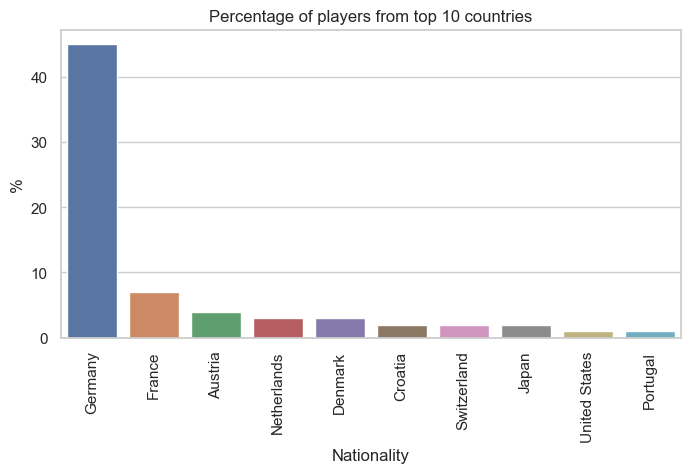

In [890]:
# Create a Seaborn bar plot of percentage of players from top 10 nations
plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_percentage_occurence, x='nationality', y='%')
plt.xlabel('Nationality')
plt.ylabel('%')
plt.title('Percentage of players from top 10 countries')
plt.xticks(rotation=90)

Over 45% of the players in the first division are from Germany while foriegners are below 10% with French players occupying 7% of the total players in the division. Shows that the league invests more in home grown players than foriegn players.

In [891]:
player_data_first_division.head()

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,...,outfitter,age_group,day_joined,month_joined,year_joined,year_exp,remaining_contract,total_years_in_bundesliga,total_years_in_club,league_division
0,Manuel Neuer,37,1.93,Germany,None,Gelsenkirchen,7.0,45.0,Goalkeeper,1,...,adidas,Veteran,7,1,2011,2024,1,12,13,first division
1,Sven Ulreich,34,1.92,Germany,None,Schorndorf,0.9,6.0,Goalkeeper,26,...,adidas,Peak player,7,1,2021,2024,1,2,3,first division
2,Johannes Schenk,20,1.91,Germany,None,Schweinfurt,0.3,0.3,Goalkeeper,35,...,Not available,First team,7,1,2022,2024,1,1,2,first division
3,Joshua Kimmich,28,1.77,Germany,None,Rottweil,80.0,90.0,midfield - Defensive Midfield,6,...,Not available,Peak player,7,2,2015,2025,2,8,10,first division
4,Leon Goretzka,28,1.89,Germany,None,Bochum,65.0,70.0,midfield - Central Midfield,8,...,Not available,Peak player,7,1,2018,2026,3,5,8,first division


In [892]:
#Mean value of all players in the first division
player_data_first_division['price'].mean()

8.692334669338678

C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\884099633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(player_data_first_division['price'])


<Axes: xlabel='price', ylabel='Density'>

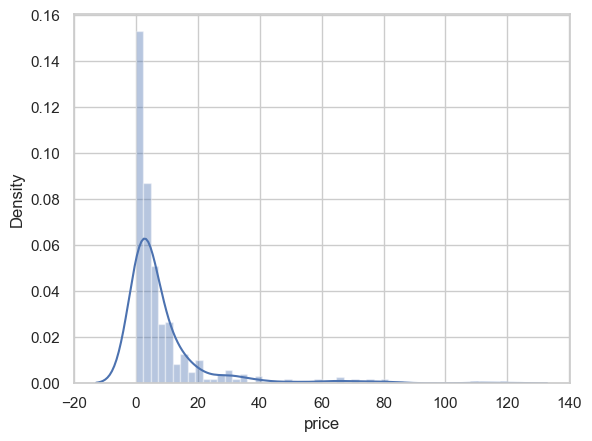

In [893]:
#A distribution of the price of players
sns.distplot(player_data_first_division['price'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Veteran'),
  Text(1, 0, 'Peak player'),
  Text(2, 0, 'First team'),
  Text(3, 0, 'Prospect')])

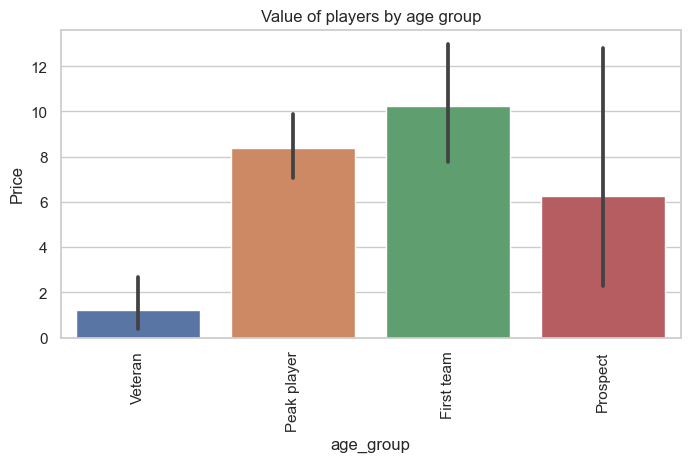

In [894]:
#Average player value by age group
#Using seaborn's bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=player_data_first_division, x='age_group', y='price')
plt.xlabel('age_group')
plt.ylabel('Price')
plt.title('Value of players by age group')
plt.xticks(rotation=90)

In [895]:
#Top 10 most valuable players in the first division
top10_valuable = player_data_first_division.sort_values('price', ascending = False)[['name', 'club','age', 'price']].head(10)
top10_valuable

,name,club,age,price
359,Jude Bellingham,Bor. Dortmund,19,120.0
5,Jamal Musiala,Bayern Munich,20,110.0
44,Florian Wirtz,B. Leverkusen,20,85.0
276,Christopher Nkunku,RB Leipzig,25,80.0
3,Joshua Kimmich,Bayern Munich,28,80.0
251,Matthijs de Ligt,Bayern Munich,23,75.0
318,Josko Gvardiol,RB Leipzig,21,75.0
304,Alphonso Davies,Bayern Munich,22,70.0
8,Leroy SanÃ©,Bayern Munich,27,70.0
281,Randal Kolo Muani,E. Frankfurt,24,65.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Jude Bellingham'),
  Text(1, 0, 'Jamal Musiala'),
  Text(2, 0, 'Florian Wirtz'),
  Text(3, 0, 'Christopher Nkunku'),
  Text(4, 0, 'Joshua Kimmich'),
  Text(5, 0, 'Matthijs de Ligt'),
  Text(6, 0, 'Josko Gvardiol'),
  Text(7, 0, 'Alphonso Davies'),
  Text(8, 0, 'Leroy SanÃ©'),
  Text(9, 0, 'Randal Kolo Muani')])

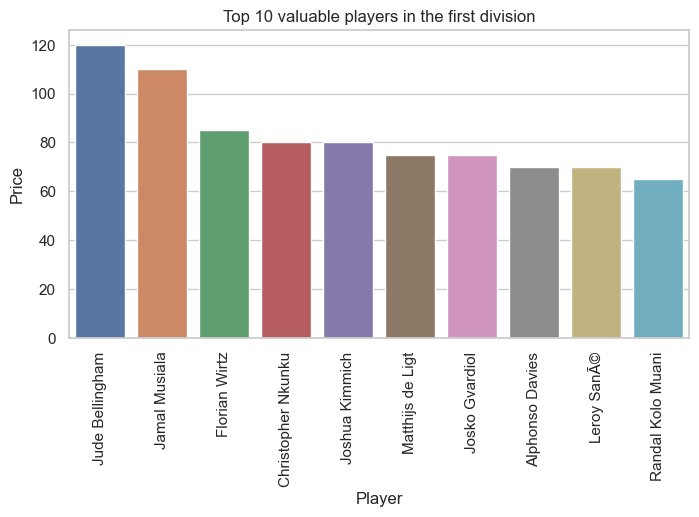

In [896]:
#Top 10 valuable players in the first division
#Using seaborn's bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=top10_valuable, x='name', y='price')
plt.xlabel('Player')
plt.ylabel('Price')
plt.title('Top 10 valuable players in the first division')
plt.xticks(rotation=90)

In [897]:
#Most valuable players by position
#Get the index of the most valuable players by position
idx_v = player_data_first_division.groupby('position')['price'].idxmax()

#Get the names position and club of these index
most_valuable_position = player_data_first_division.loc[idx_v, ['name','position','club','price']]

most_valuable_position.sort_values('price', ascending = False)


,name,position,club,price
359,Jude Bellingham,midfield - Central Midfield,Bor. Dortmund,120.0
5,Jamal Musiala,midfield - Attacking Midfield,Bayern Munich,110.0
276,Christopher Nkunku,Attack - Second Striker,RB Leipzig,80.0
3,Joshua Kimmich,midfield - Defensive Midfield,Bayern Munich,80.0
251,Matthijs de Ligt,Defender - Centre-Back,Bayern Munich,75.0
8,Leroy SanÃ©,Attack - Right Winger,Bayern Munich,70.0
304,Alphonso Davies,Defender - Left-Back,Bayern Munich,70.0
281,Randal Kolo Muani,Attack - Centre-Forward,E. Frankfurt,65.0
270,Kingsley Coman,Attack - Left Winger,Bayern Munich,65.0
305,JoÃ£o Cancelo,Defender - Right-Back,Bayern Munich,60.0


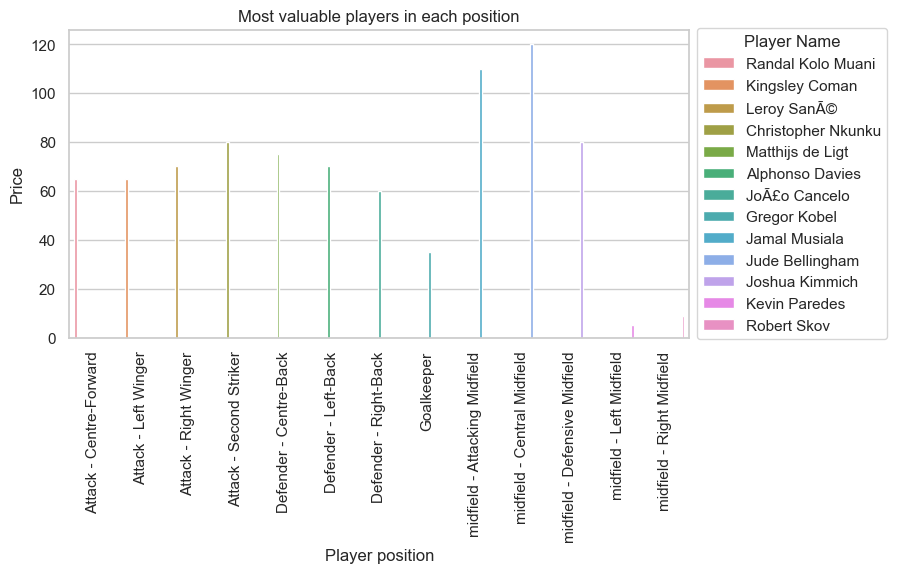

In [898]:
# Create a Seaborn bar plot of most valuable players by position
plt.figure(figsize=(8, 4))
sns.barplot(data=most_valuable_position, x='position', y='price', hue='name')
plt.xlabel('Player position')
plt.ylabel('Price')
plt.title('Most valuable players in each position')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Player Name')

In [899]:
#Avarage value of players by club
#Group the data by club and get the mean price for each club
price_by_club = player_data_first_division.groupby('club')['price'].mean().reset_index()

#Sort the values by price in descending order
price_by_club.sort_values('price', ascending = False)

,club,price
3,Bayern Munich,36.285185
10,RB Leipzig,19.688000
4,Bor. Dortmund,18.193333
2,B. Leverkusen,15.624074
6,E. Frankfurt,9.991667
5,Bor. M'gladbach,8.455556
16,VfL Wolfsburg,8.028000
11,SC Freiburg,6.226923
12,TSG Hoffenheim,4.988710
13,Union Berlin,4.670370


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '1.FC KÃ¶ln'),
  Text(1, 0, '1.FSV Mainz 05'),
  Text(2, 0, 'B. Leverkusen'),
  Text(3, 0, 'Bayern Munich'),
  Text(4, 0, 'Bor. Dortmund'),
  Text(5, 0, "Bor. M'gladbach"),
  Text(6, 0, 'E. Frankfurt'),
  Text(7, 0, 'FC Augsburg'),
  Text(8, 0, 'FC Schalke 04'),
  Text(9, 0, 'Hertha BSC'),
  Text(10, 0, 'RB Leipzig'),
  Text(11, 0, 'SC Freiburg'),
  Text(12, 0, 'TSG Hoffenheim'),
  Text(13, 0, 'Union Berlin'),
  Text(14, 0, 'VfB Stuttgart'),
  Text(15, 0, 'VfL Bochum'),
  Text(16, 0, 'VfL Wolfsburg'),
  Text(17, 0, 'Werder Bremen')])

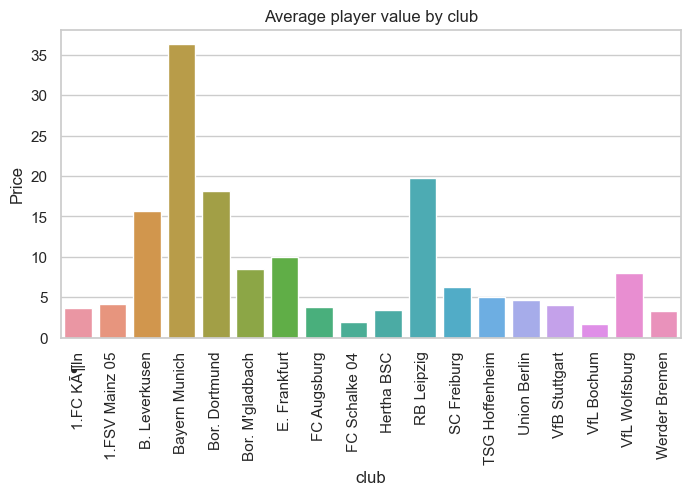

In [900]:
# Create a Seaborn bar plot of average value of players by club
plt.figure(figsize=(8, 4))
sns.barplot(data=price_by_club, x='club', y='price')
plt.xlabel('club')
plt.ylabel('Price')
plt.title('Average player value by club')
plt.xticks(rotation=90)

In [901]:
#Average value of players by position

#Group the data by club and get the mean price for each club
price_by_position = player_data_first_division.groupby('position')['price'].mean().reset_index()

#Sort the values by price in descending order
price_by_position.sort_values('price', ascending = False)

,position,price
3,Attack - Second Striker,17.928571
8,midfield - Attacking Midfield,13.752632
1,Attack - Left Winger,12.218182
2,Attack - Right Winger,10.865000
4,Defender - Centre-Back,10.557647
9,midfield - Central Midfield,10.263636
0,Attack - Centre-Forward,7.852817
6,Defender - Right-Back,7.842045
10,midfield - Defensive Midfield,7.331579
5,Defender - Left-Back,7.137179


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Attack - Centre-Forward'),
  Text(1, 0, 'Attack - Left Winger'),
  Text(2, 0, 'Attack - Right Winger'),
  Text(3, 0, 'Attack - Second Striker'),
  Text(4, 0, 'Defender - Centre-Back'),
  Text(5, 0, 'Defender - Left-Back'),
  Text(6, 0, 'Defender - Right-Back'),
  Text(7, 0, 'Goalkeeper'),
  Text(8, 0, 'midfield - Attacking Midfield'),
  Text(9, 0, 'midfield - Central Midfield'),
  Text(10, 0, 'midfield - Defensive Midfield'),
  Text(11, 0, 'midfield - Left Midfield'),
  Text(12, 0, 'midfield - Right Midfield')])

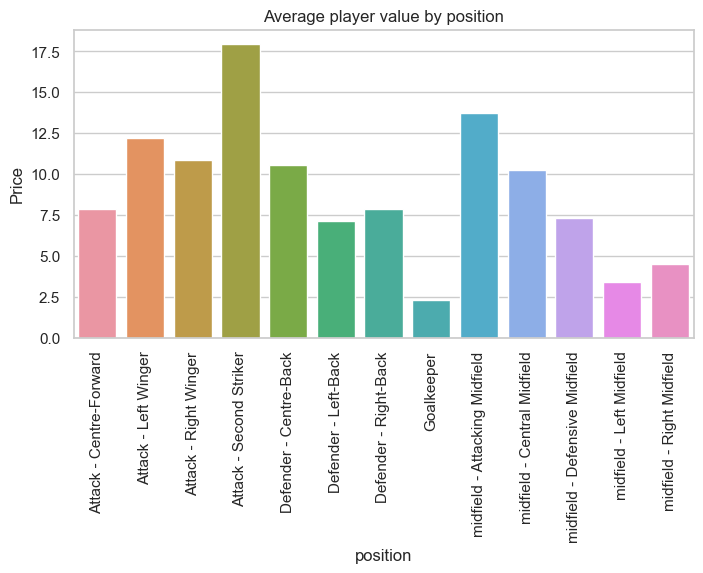

In [902]:
# Create a Seaborn bar plot of average value of players by position
plt.figure(figsize=(8, 4))
sns.barplot(data=price_by_position, x='position', y='price')
plt.xlabel('position')
plt.ylabel('Price')
plt.title('Average player value by position')
plt.xticks(rotation=90)

It is no surprise that the top 5 clubs in the division have the most valuable players in the division with Jude Bellingham of B. Dortmund being the most valuable player in the league. German gaints, Bayern munich have 5 players, while liepzig, frankfurt and leverkuzeen complete the top 10 in the league.

For the valuble players in every football position in the league, bayern dominate by having the most valuble players in 7 positions in the league.

Bayern munich also dominate when it comes to the average value of players in each club with an average value of 35 million

In terms of the average value of players by their position, the Second striker role in attack has the highest value with just over 17.5 million. Goalkeepers have the least average value in the league with an average of around 2.3 million

In [903]:
# Group the data by agency and count the number of players managed by each agency
agency_counts = player_data_first_division.groupby('player_agent')['name'].count().reset_index()

# Sort agencies by the number of players managed in descending order
agency_counts = agency_counts.sort_values(by='name', ascending=False)

# Select the top 10 agencies
top_10_agencies = agency_counts.head(10)

top_10_agencies
# Initialize a list to store the players managed by the top 10 agencies
top_10_players = []

# Extract the list of players managed by each of the top 10 agencies
for agency in top_10_agencies['player_agent']:
    players_managed = player_data_first_division[player_data_first_division['player_agent'] == agency]['name']
    top_10_players.append(players_managed)

# Create a DataFrame to display the results
result_df = top_10_agencies.copy()
result_df['Players Managed'] = top_10_players
result_df

,player_agent,name,Players Managed
120,ROOF,30,9 Serge Gnabry 32 D...
146,Sports360 GmbH,27,15 Niklas SÃ¼le 34 ...
64,Himself,25,3 Joshua Kimmich 43 ...
124,Relatives,19,24 Julian Brandt 44 Florian ...
166,Wasserman,18,18 Tom Rothe 27 Yous...
159,Unique Sports Group,18,80 Noah Atubolu 82 Matthias G...
110,PRO Profil GmbH,17,0 Manuel Neuer 28 Jan...
119,ROGON,16,19 Nico Schulz 20 ...
25,CAA Stellar,12,118 Levin Ãztunali 205 Anthony...
27,CN Sports,10,35 Benjamin Henrichs 66 Florian Neuh...


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ROOF'),
  Text(1, 0, 'Sports360 GmbH'),
  Text(2, 0, 'Himself'),
  Text(3, 0, 'Relatives'),
  Text(4, 0, 'Wasserman'),
  Text(5, 0, 'Unique Sports Group'),
  Text(6, 0, 'PRO Profil GmbH'),
  Text(7, 0, 'ROGON'),
  Text(8, 0, 'CAA Stellar'),
  Text(9, 0, 'CN Sports')])

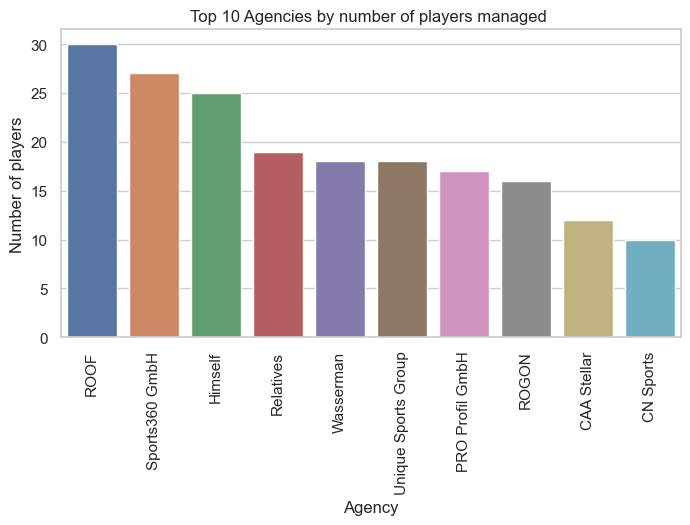

In [904]:
#Top 10 Agencies in the first division
#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = top_10_agencies, x='player_agent', y='name' )
#Label X axis
plt.xlabel('Agency')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Top 10 Agencies by number of players managed ")
#Adjust the x ticks
plt.xticks(rotation=90)

We have 181 different agencies that manage the players in the first division of the german league with the ROOF agency managing the highest number of players in the league (30).

In [905]:
#Name of players under ROOF agency
ROOF_players = player_data_first_division[player_data_first_division['player_agent'] == 'ROOF'][['name', 'club']]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Bayern Munich'),
  Text(1, 0, 'RB Leipzig'),
  Text(2, 0, 'E. Frankfurt'),
  Text(3, 0, "Bor. M'gladbach"),
  Text(4, 0, 'SC Freiburg'),
  Text(5, 0, 'TSG Hoffenheim'),
  Text(6, 0, '1.FSV Mainz 05'),
  Text(7, 0, '1.FC KÃ¶ln'),
  Text(8, 0, 'Werder Bremen'),
  Text(9, 0, 'FC Schalke 04'),
  Text(10, 0, 'VfL Bochum'),
  Text(11, 0, 'FC Augsburg'),
  Text(12, 0, 'VfL Wolfsburg'),
  Text(13, 0, 'Union Berlin')])

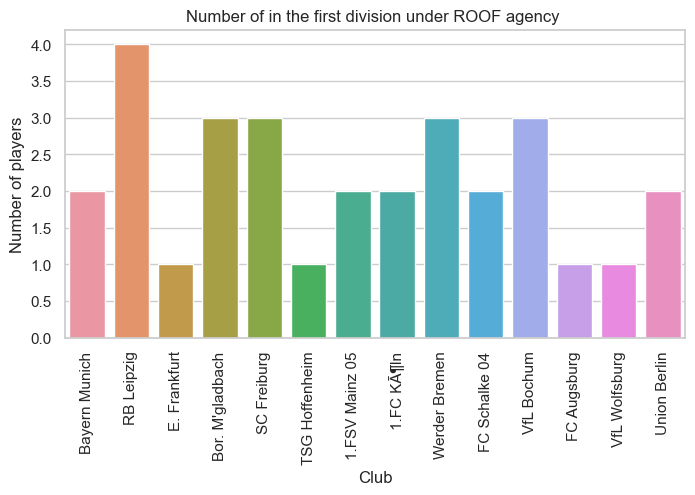

In [906]:
#Number of players in each club under ROOF agency
#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the count of number of players in each club
sns.countplot(data = ROOF_players, x='club')
#Label X axis
plt.xlabel('Club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Number of in the first division under ROOF agency ")
#Adjust the x ticks
plt.xticks(rotation=90)

In [907]:
#Name of players under Himself agency
himself_players = player_data_first_division[player_data_first_division['player_agent'] == 'Himself'][['name', 'club']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Bayern Munich'),
  Text(1, 0, 'B. Leverkusen'),
  Text(2, 0, 'E. Frankfurt'),
  Text(3, 0, 'VfL Wolfsburg'),
  Text(4, 0, 'SC Freiburg'),
  Text(5, 0, 'FC Augsburg'),
  Text(6, 0, 'VfB Stuttgart'),
  Text(7, 0, 'FC Schalke 04'),
  Text(8, 0, 'Union Berlin'),
  Text(9, 0, 'TSG Hoffenheim'),
  Text(10, 0, 'Bor. Dortmund'),
  Text(11, 0, 'Werder Bremen')])

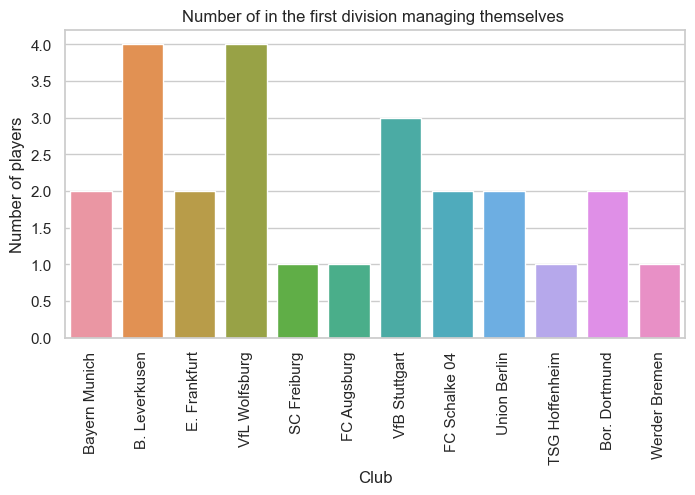

In [908]:
#Number of players in each club under Himself agency
#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the count of number of players in each club
sns.countplot(data = himself_players, x='club')
#Label X axis
plt.xlabel('Club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Number of in the first division managing themselves ")
#Adjust the x ticks
plt.xticks(rotation=90)

The ROOF Agency, the top agency in the first division, manages it's highest number of players in RB Leipzig with a total of 4 players. While Sporting360 has it's highest number of players in hertha BC. 

In [909]:
#Name of players under Sports360 GmbH agency
sports360_players = player_data_first_division[player_data_first_division['player_agent'] == 'Sports360 GmbH'][['name', 'club']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Bor. Dortmund'),
  Text(1, 0, 'RB Leipzig'),
  Text(2, 0, 'E. Frankfurt'),
  Text(3, 0, "Bor. M'gladbach"),
  Text(4, 0, 'VfL Wolfsburg'),
  Text(5, 0, 'TSG Hoffenheim'),
  Text(6, 0, 'Union Berlin'),
  Text(7, 0, 'FC Augsburg'),
  Text(8, 0, '1.FSV Mainz 05'),
  Text(9, 0, '1.FC KÃ¶ln'),
  Text(10, 0, 'Hertha BSC'),
  Text(11, 0, 'Werder Bremen'),
  Text(12, 0, 'FC Schalke 04'),
  Text(13, 0, 'VfL Bochum')])

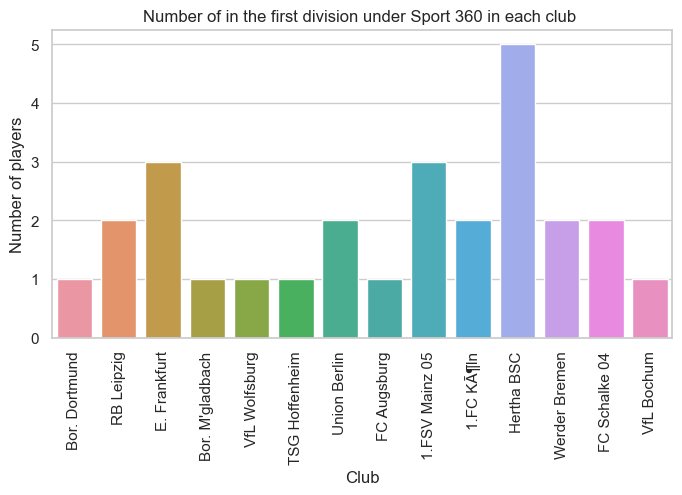

In [910]:
#Number of players in each club under Sport 360 agency
#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the count of number of players in each club
sns.countplot(data = sports360_players, x='club')
#Label X axis
plt.xlabel('Club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Number of in the first division under Sport 360 in each club ")
#Adjust the x ticks
plt.xticks(rotation=90)

For Sport360 Agency, they manage the second highest number of players in the first division, a total of 27 players across the division. They have 5 players in Hertha BSC which is the highest number in a club. 18% of their player base in the first division

In [911]:
#Total number of Agents in the first division
player_data_first_division['player_agent'].nunique()

181

In [912]:
#Top 10 agents with the average highest value of players in the first division
agent_price = player_data_first_division.groupby('player_agent')['price'].mean().reset_index()

top_agents_by_value = agent_price.sort_values('price', ascending = False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Marjan Sisic'),
  Text(1, 0, 'ATG Sports'),
  Text(2, 0, 'Neubauer 13 GmbH'),
  Text(3, 0, 'AIS SPORT SERVICE'),
  Text(4, 0, 'Manuel GarcÃ\xada ...'),
  Text(5, 0, 'Gestifute'),
  Text(6, 0, 'Gol International'),
  Text(7, 0, 'SBE Management AG'),
  Text(8, 0, 'Prolific Sports ...'),
  Text(9, 0, 'Carmenta')])

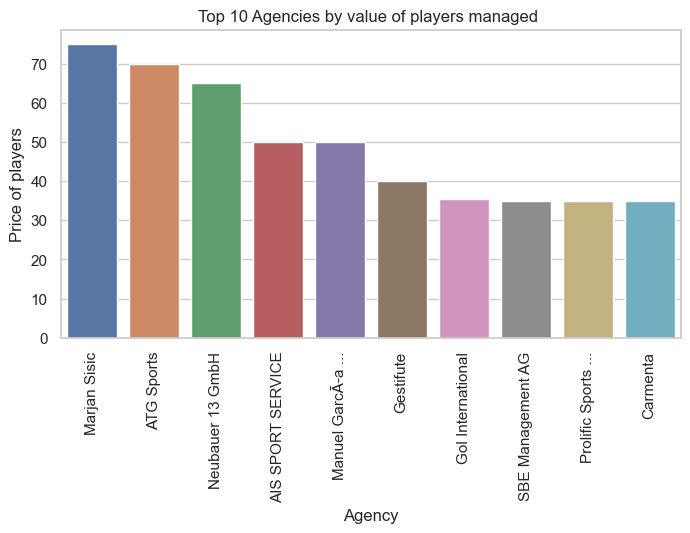

In [913]:
#Top 10 Agencies in the first division by average value of players
#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = top_agents_by_value, x='player_agent', y='price' )
#Label X axis
plt.xlabel('Agency')
#Label Y axis
plt.ylabel('Price of players')
#Title label
plt.title("Top 10 Agencies by value of players managed ")
#Adjust the x ticks
plt.xticks(rotation=90)

In [914]:
#Number of outfiters in the league

player_data_first_division['outfitter'].nunique()

9

In [915]:
#Top outfitters in the first division
top_outfitter = player_data_first_division['outfitter'].value_counts().reset_index()

top_outfitter.rename(columns ={'index':'outfitter', 'outfitter': 'count'}, inplace=True)
top_outfitter

,outfitter,count
0,Not available,310
1,adidas,81
2,Nike,59
3,Puma,42
4,Under Armour,2
5,Uhlsport,2
6,HashtagOne,1
7,New Balance,1
8,Mizuno,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Not available'),
  Text(1, 0, 'adidas'),
  Text(2, 0, 'Nike'),
  Text(3, 0, 'Puma'),
  Text(4, 0, 'Under Armour'),
  Text(5, 0, 'Uhlsport'),
  Text(6, 0, 'HashtagOne'),
  Text(7, 0, 'New Balance'),
  Text(8, 0, 'Mizuno')])

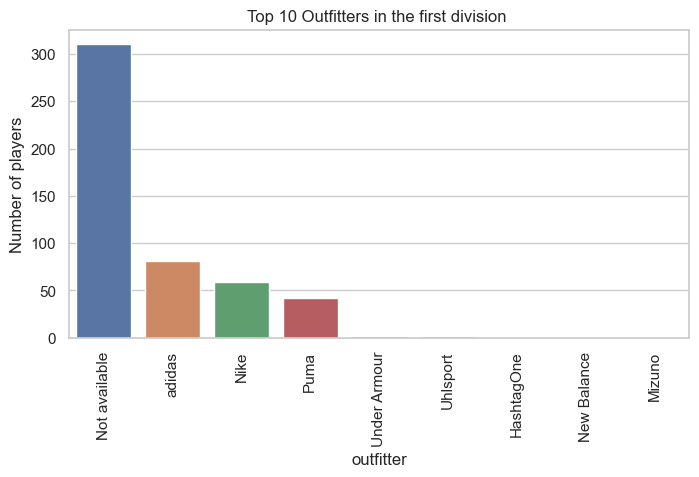

In [916]:
#Top 10 outfitters in the first division
#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = top_outfitter, x='outfitter', y='count' )
#Label X axis
plt.xlabel('outfitter')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Top 10 Outfitters in the first division ")
#Adjust the x ticks
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'VfL Bochum'),
  Text(1, 0, 'FC Schalke 04'),
  Text(2, 0, 'SC Freiburg'),
  Text(3, 0, '1.FC KÃ¶ln'),
  Text(4, 0, 'FC Augsburg'),
  Text(5, 0, '1.FSV Mainz 05'),
  Text(6, 0, 'Hertha BSC'),
  Text(7, 0, 'VfL Wolfsburg'),
  Text(8, 0, 'VfB Stuttgart'),
  Text(9, 0, 'Werder Bremen'),
  Text(10, 0, 'E. Frankfurt'),
  Text(11, 0, 'TSG Hoffenheim'),
  Text(12, 0, 'Union Berlin'),
  Text(13, 0, 'RB Leipzig'),
  Text(14, 0, 'Bor. Dortmund'),
  Text(15, 0, 'B. Leverkusen'),
  Text(16, 0, "Bor. M'gladbach"),
  Text(17, 0, 'Bayern Munich')])

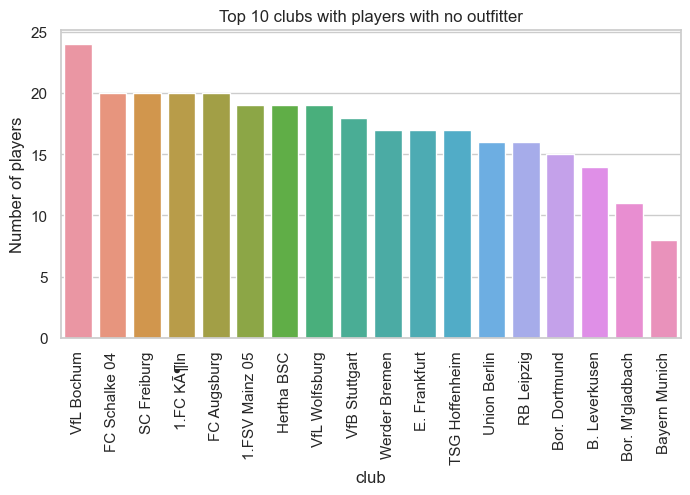

In [917]:
#Clubs with the highest number of players without outfitters
no_outfitter = player_data_first_division[player_data_first_division['outfitter'] == 'Not available']['club'].value_counts().reset_index()

#Rename columns
no_outfitter.rename(columns ={'index':'club', 'club': 'count'}, inplace=True)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = no_outfitter, x='club', y='count' )
#Label X axis
plt.xlabel('club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Top 10 clubs with players with no outfitter")
#Adjust the x ticks
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Bayern Munich'),
  Text(1, 0, 'TSG Hoffenheim'),
  Text(2, 0, 'FC Schalke 04'),
  Text(3, 0, 'B. Leverkusen'),
  Text(4, 0, 'E. Frankfurt'),
  Text(5, 0, '1.FSV Mainz 05'),
  Text(6, 0, 'Bor. Dortmund'),
  Text(7, 0, 'Union Berlin'),
  Text(8, 0, "Bor. M'gladbach"),
  Text(9, 0, 'VfL Wolfsburg'),
  Text(10, 0, 'Werder Bremen'),
  Text(11, 0, 'RB Leipzig'),
  Text(12, 0, 'FC Augsburg'),
  Text(13, 0, 'VfB Stuttgart'),
  Text(14, 0, '1.FC KÃ¶ln'),
  Text(15, 0, 'SC Freiburg'),
  Text(16, 0, 'Hertha BSC'),
  Text(17, 0, 'VfL Bochum')])

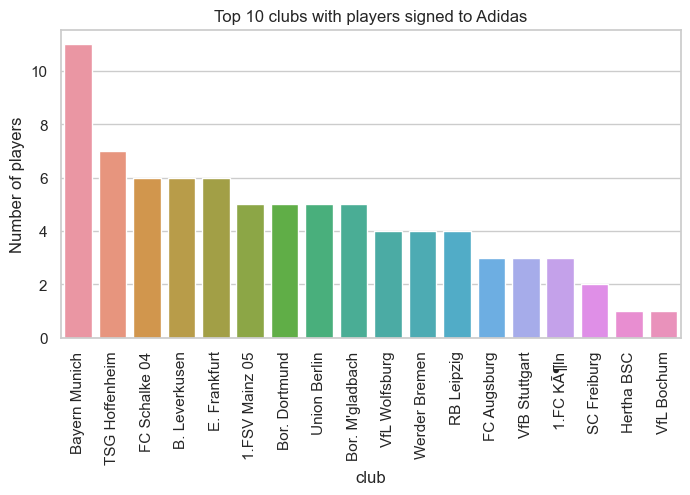

In [918]:
#Clubs with the highest number of players signed under Adidas
adidas_outfitter = player_data_first_division[player_data_first_division['outfitter'] == 'adidas']['club'].value_counts().reset_index()

#Rename columns
adidas_outfitter.rename(columns ={'index':'club', 'club': 'count'}, inplace=True)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = adidas_outfitter, x='club', y='count' )
#Label X axis
plt.xlabel('club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Top 10 clubs with players signed to Adidas")
#Adjust the x ticks
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Hertha BSC'),
  Text(1, 0, 'TSG Hoffenheim'),
  Text(2, 0, 'Bor. Dortmund'),
  Text(3, 0, 'VfB Stuttgart'),
  Text(4, 0, "Bor. M'gladbach"),
  Text(5, 0, 'Bayern Munich'),
  Text(6, 0, 'FC Augsburg'),
  Text(7, 0, 'E. Frankfurt'),
  Text(8, 0, 'B. Leverkusen'),
  Text(9, 0, 'Union Berlin'),
  Text(10, 0, 'FC Schalke 04'),
  Text(11, 0, 'RB Leipzig'),
  Text(12, 0, 'SC Freiburg'),
  Text(13, 0, '1.FSV Mainz 05'),
  Text(14, 0, '1.FC KÃ¶ln'),
  Text(15, 0, 'Werder Bremen'),
  Text(16, 0, 'VfL Bochum'),
  Text(17, 0, 'VfL Wolfsburg')])

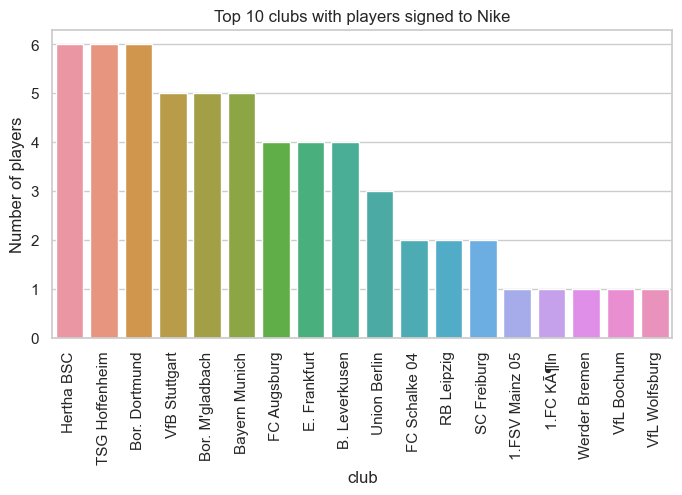

In [919]:
#Clubs with the highest number of players signed under Nike
nike_outfitter = player_data_first_division[player_data_first_division['outfitter'] == 'Nike']['club'].value_counts().reset_index()

#Rename columns
nike_outfitter.rename(columns ={'index':'club', 'club': 'count'}, inplace=True)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = nike_outfitter, x='club', y='count' )
#Label X axis
plt.xlabel('club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Top 10 clubs with players signed to Nike")
#Adjust the x ticks
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, "Bor. M'gladbach"),
  Text(1, 0, 'Bor. Dortmund'),
  Text(2, 0, 'RB Leipzig'),
  Text(3, 0, 'Union Berlin'),
  Text(4, 0, 'FC Augsburg'),
  Text(5, 0, 'VfB Stuttgart'),
  Text(6, 0, '1.FC KÃ¶ln'),
  Text(7, 0, 'VfL Bochum'),
  Text(8, 0, '1.FSV Mainz 05'),
  Text(9, 0, 'Bayern Munich'),
  Text(10, 0, 'Werder Bremen'),
  Text(11, 0, 'FC Schalke 04'),
  Text(12, 0, 'E. Frankfurt'),
  Text(13, 0, 'SC Freiburg'),
  Text(14, 0, 'B. Leverkusen'),
  Text(15, 0, 'VfL Wolfsburg'),
  Text(16, 0, 'Hertha BSC')])

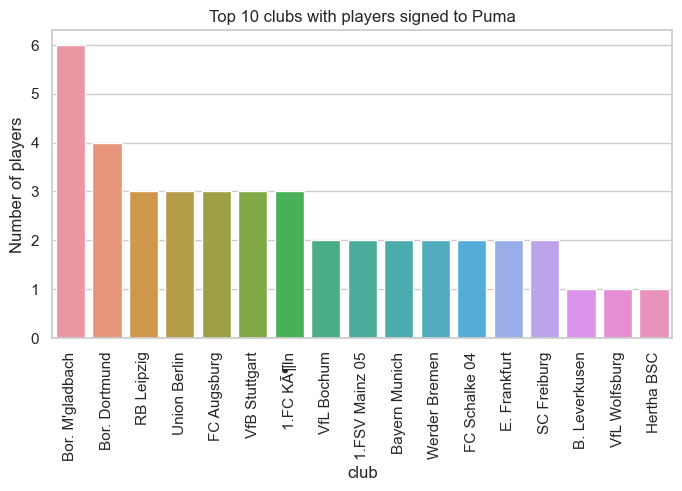

In [920]:
#Clubs with the highest number of players signed under Puma
puma_outfitter = player_data_first_division[player_data_first_division['outfitter'] == 'Puma']['club'].value_counts().reset_index()

#Rename columns
puma_outfitter.rename(columns ={'index':'club', 'club': 'count'}, inplace=True)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = puma_outfitter, x='club', y='count' )
#Label X axis
plt.xlabel('club')
#Label Y axis
plt.ylabel('Number of players')
#Title label
plt.title("Top 10 clubs with players signed to Puma")
#Adjust the x ticks
plt.xticks(rotation=90)

While most of the players in the first division do not have a sponsor (over 60% of the players). Adidas, Nike and Puma are the top sponsors with Adidas sponsoring around 16% of the players in the league, Nike 12% and puma 8% with the remaining 2% sponsored by Under Armour, Uhlsport, HashtagOne, New Balance and Mizuno

Adidas has its highest player sponsorship in Bayern Munich, having 11 players in the club signed to them.
Nike has its highest player sponsorship in Hertha BSC, TSG Hoffenheim and Bor. Dortmund, having 6 players each in the club signed to them.
Puma has its highest player sponsorship in Bor. M'gladbach, having 6 players in the club signed to them.

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

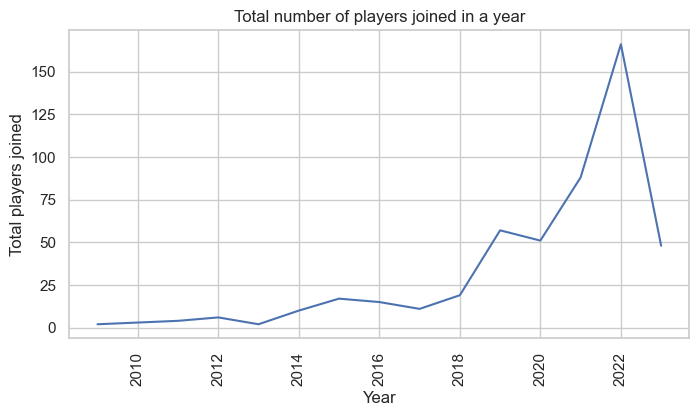

In [922]:
#Number of players signed in the first division in a year
year_joined =player_data_first_division['year_joined'].value_counts().reset_index()

#Rename columns
year_joined.rename(columns ={'index':'Year', 'year_joined': 'total_players_joined'}, inplace=True)

#sort by number of players joined
year_joined = year_joined.sort_values('Year', ascending = False)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.lineplot(data = year_joined, x='Year', y='total_players_joined' )
#Label X axis
plt.xlabel('Year')
#Label Y axis
plt.ylabel('Total players joined')
#Title label
plt.title("Total number of players joined in a year")
#Adjust the x ticks
plt.xticks(rotation=90)

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(2008.0, 0, '2008'),
  Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022'),
  Text(2024.0, 0, '2024')])

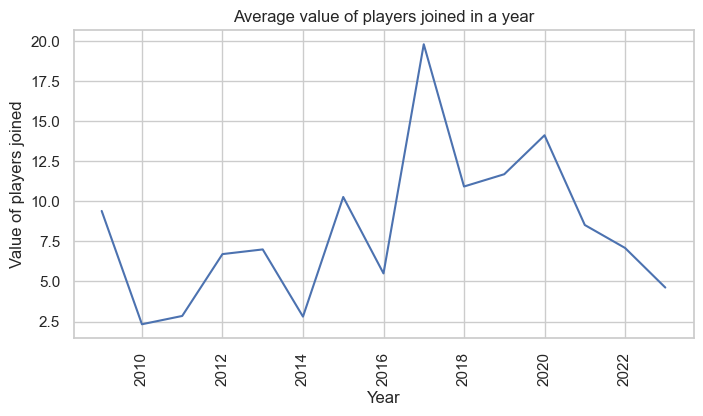

In [923]:
#The average value of players that joined in each year
#Group players the year joined and average value for each year
value_year_joined = player_data_first_division.groupby('year_joined')['price'].mean().reset_index()

#sort by price in ascending order
value_year_joined = value_year_joined.sort_values('price', ascending = False)


#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.lineplot(data = value_year_joined, x='year_joined', y='price' , markers=True, dashes=False)
#Label X axis
plt.xlabel('Year')
#Label Y axis
plt.ylabel('Value of players joined')
#Title label
plt.title("Average value of players joined in a year")
#Adjust the x ticks
plt.xticks(rotation=90)

In [924]:
#The number of players joined by club
#Group players the year joined and average value for each year
club_year_joined = player_data_first_division.groupby('year_joined')['club'].value_counts()

#sort by price in ascending order
#club_year_joined = value_year_joined.sort_values('price', ascending = False)
club_year_joined

year_joined  club           
2009         Bayern Munich      1
             Bor. M'gladbach    1
2010         1.FSV Mainz 05     1
             Bor. M'gladbach    1
             SC Freiburg        1
                               ..
2023         VfB Stuttgart      2
             1.FC KÃ¶ln         1
             SC Freiburg        1
             VfL Wolfsburg      1
             Werder Bremen      1
Name: club, Length: 150, dtype: int64

Text(92.25, 0.5, 'Join Year')

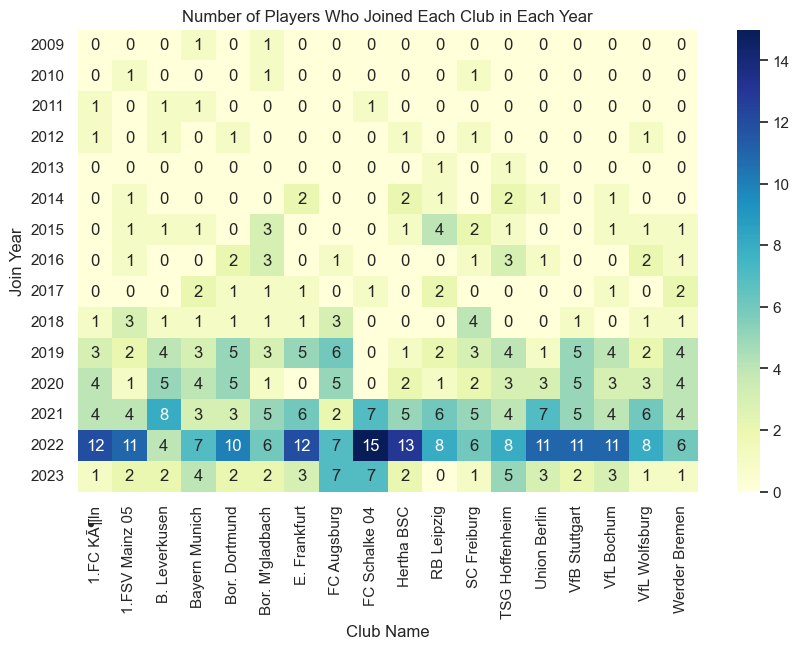

In [925]:

# Create a pivot table to count the number of players who joined each club in each year
pivot_table = pd.pivot_table(player_data_first_division, values='name', index='year_joined', columns='club', aggfunc='count', fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Number of Players Who Joined Each Club in Each Year')
plt.xlabel('Club Name')
plt.ylabel('Join Year')



Text(67.25, 0.5, 'Join Year')

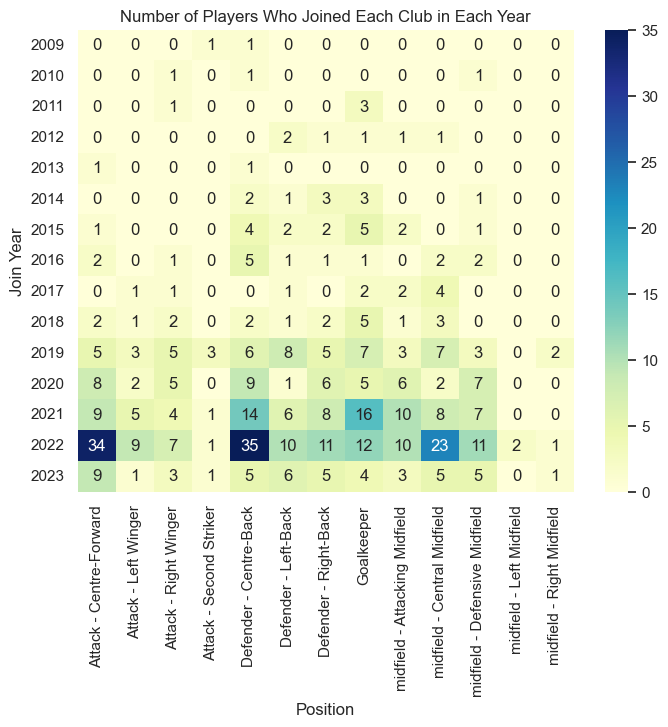

In [926]:
# Create a pivot table to count the number of players who joined by position in each year
pivot_table_position = pd.pivot_table(player_data_first_division, values='name', index='year_joined', columns='position', aggfunc='count', fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_position, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Number of Players Who Joined Each Club in Each Year')
plt.xlabel('Position')
plt.ylabel('Join Year')

In the year 2022, a total of 166 players joined the first division being the highest number of players in the last decade. From the year 2009 the chart shows a positive slope year on year which shows how much the first division has improved in the last decade. 

In 2022, Schalke 04 has the highest number of players who joined the club with a total of 15 players while 12 joined Hertha BSC and 11 joined FC Koln

Also, in 2022, the league signed the highest number of players in the centre back position, a total of 35 players signed while a total of 34 centre forwards were signed in the same year.

In terms of the value of players signed, in 2017, the league signed players with an average value of almost 20 million making it the year with the highest in terms of the average value of players joined.

(array([2022., 2023., 2024., 2025., 2026., 2027., 2028., 2029.]),
 [Text(2022.0, 0, '2022'),
  Text(2023.0, 0, '2023'),
  Text(2024.0, 0, '2024'),
  Text(2025.0, 0, '2025'),
  Text(2026.0, 0, '2026'),
  Text(2027.0, 0, '2027'),
  Text(2028.0, 0, '2028'),
  Text(2029.0, 0, '2029')])

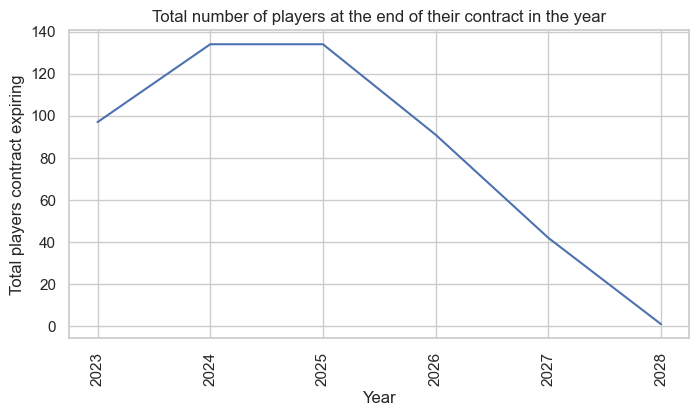

In [927]:
#Year players contracts expire
year_expire =player_data_first_division['year_exp'].value_counts().reset_index()

#Rename columns
year_expire.rename(columns ={'index':'Year', 'year_exp': 'total_players_expire'}, inplace=True)

#sort by number of players joined
year_joined = year_joined.sort_values('Year', ascending = False)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.lineplot(data = year_expire, x='Year', y='total_players_expire' )
#Label X axis
plt.xlabel('Year')
#Label Y axis
plt.ylabel('Total players contract expiring')
#Title label
plt.title("Total number of players at the end of their contract in the year")
#Adjust the x ticks
plt.xticks(rotation=90)

C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\144599623.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(player_expiry_after2025['age'])


<Axes: xlabel='age', ylabel='Density'>

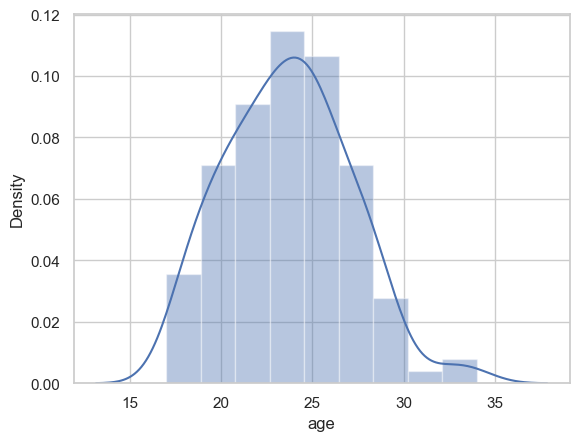

In [928]:
#Filter the players that have their contract expire after 2025
player_expiry_after2025 = player_data_first_division[player_data_first_division['year_exp']>2025]

#Plot the age distribution of players 
sns.distplot(player_expiry_after2025['age'])

In [929]:
player_data_first_division[(player_data_first_division['year_exp']>2025) & (player_data_first_division['age']>29)]

,name,age,height,nationality,nationality_2,place_of_birth,price,max_price,position,shirt_nr,...,outfitter,age_group,day_joined,month_joined,year_joined,year_exp,remaining_contract,total_years_in_bundesliga,total_years_in_club,league_division
46,Kevin Trapp,32,1.89,Germany,None,Merzig,8.5,12.00,Goalkeeper,1,...,adidas,Peak player,8,7,2019,2026,3,4,7,first division
48,Jens Grahl,34,1.92,Germany,None,Stuttgart,0.2,0.75,Goalkeeper,31,...,Not available,Peak player,19,7,2021,2026,3,2,5,first division
247,Silvan Widmer,30,1.83,Switzerland,None,Aarau,5.0,9.00,Defender - Right-Back,30,...,Not available,Peak player,7,9,2021,2026,3,2,5,first division
428,Lukas Hradecky,33,1.92,Finland,Slovakia,Bratislava,2.5,12.00,Goalkeeper,1,...,Uhlsport,Peak player,7,1,2018,2026,3,5,8,first division


C:\Users\Kayode\AppData\Local\Temp\ipykernel_5712\1652063983.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(player_expiry_before2025['age'])


<Axes: xlabel='age', ylabel='Density'>

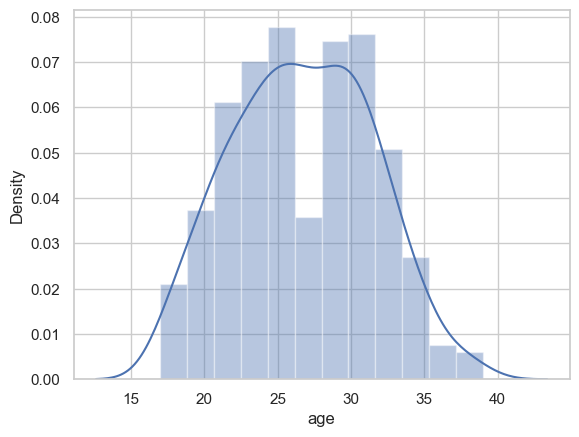

In [930]:
#Filter the players that have their contract expire after 2025
player_expiry_before2025 = player_data_first_division[player_data_first_division['year_exp']<=2025]

#Plot the age distribution of players 
sns.distplot(player_expiry_before2025['age'])

From the chart, most of the current players in the league have contracts expiring in the year 2024 and 2025. The average age of players that fall in this category are between 25 -35 years old. While for players with contracts expiring after 2025, we can see a normal distribution of ages between 23 and 28 years old.

For players, who have their contracts expiring after 2025 and are 30 years and above, we have 4 players in this category with three of them in the goalkeeping position and a Defender - Right back.

    Name   Age  Position
Kevin Trapp	32	Goalkeeper	

Jens Grahl	34	Goalkeeper

Silvan Widmer 30 Defender - Right-Back

Lukas Hradecky	33 Goalkeeper	

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Thomas MÃ¼ller'),
  Text(1, 0, 'Tony Jantschke'),
  Text(2, 0, 'Maximilian Arnold'),
  Text(3, 0, 'Ralf FÃ¤hrmann'),
  Text(4, 0, 'Stefan Bell'),
  Text(5, 0, 'Nicolas HÃ¶fler'),
  Text(6, 0, 'Patrick Herrmann'),
  Text(7, 0, 'Manuel Neuer'),
  Text(8, 0, 'Maximilian MittelstÃ¤dt'),
  Text(9, 0, 'Christian GÃ¼nter'),
  Text(10, 0, 'Timo Horn'),
  Text(11, 0, 'Karim Bellarabi'),
  Text(12, 0, 'Niklas Lomb'),
  Text(13, 0, 'Marco Reus'),
  Text(14, 0, 'Jonas Hector')])

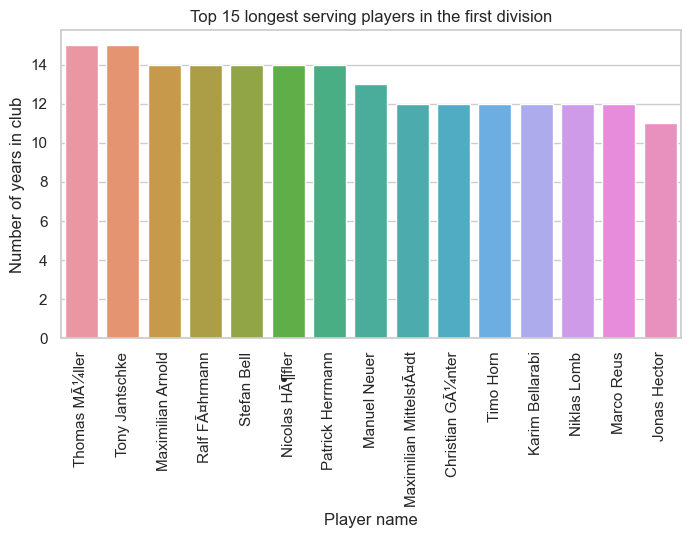

In [939]:
#Years in club
longest_serving_player = player_data_first_division[player_data_first_division['total_years_in_club'] >= 10][['name', 'total_years_in_club', 'club']].sort_values('total_years_in_club', ascending=False)

#Top 15 longest serving players
top15_longest_serving_player = longest_serving_player.head(15)

#Create the plot size
plt.figure(figsize=(8,4))
#Use seaborn's count plot to plot the number of players managed by an agency
sns.barplot(data = top15_longest_serving_player, x='name', y='total_years_in_club')
#Label X axis
plt.xlabel('Player name')
#Label Y axis
plt.ylabel('Number of years in club')
#Title label
plt.title("Top 15 longest serving players in the first division")
#Adjust the x ticks
plt.xticks(rotation=90)

Thomas Mueller and Tony Jantschke are the longest serving players in the first division having being in Bayern munich and Bor. M'gladbach for 15 years.